In [2]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("dark")
plt.rcParams['figure.figsize'] = 16, 12
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

<center>
<img src="./../../img/ods_stickers.jpg" />
    
## Open Machine Learning Course, Dubai

# <center>Topic 8. Stochastic Gradient Descent

## Article outline (TODO)

0. Recap
1. Empirical risk minimization principle
2. Linear Regression using Least Squares
3. Regularized Polynomial Regression
4. Gradient Descent Algorithm
5. Logistic Regression using Stochastic Gradient Descent

## 0. Recap

- Let's remember some ideas from Lecture 3

### Machine learning

![mlvd](./../../img/bengio.png)

* ML is a subfield of AI that provides computers with the ability to learn without being explicitly programmed
* *What does learning mean?*
    * We say, that program can learn from data relatively to some class of tasks **T** and loss function $\mathcal{L}$, if quality of solution is increasing (relatively to $\mathcal{L}$) with increasing amount of data in train set (may be until some asymptote)

### Type of ML tasks

A good overview is provided in the "Machine Learning basics" chapter of ["Deep Learning"](http://www.deeplearningbook.org) (by Ian Goodfellow, Yoshua Bengio, Aaron Courville, 2016).

#### Major tasks
* *Supervised learning* - ML task of inferring a function $f: X \rightarrow Y$ from labeled data; each sample is a pair of feature vector and some desired output value $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$
        
* *Unsupervised learning* - ML task of inferring a function to describe hidden structure from unlabeled data $D = \left\{ x_i \right\}_{i=1, \ldots, n}$

* *Reinforcement learning* - ML task where agent learn optimal behaviour from his actions and response from environment

### Predictive model

*Predictive model* - is a parametric family of functions (hypothesis):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* where
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - is a set of parameters

### Learning algorithm

*Learning algorithm* - is a map from dataset to hypothesis set:

$$\large \mathcal{M}: \left(X \times Y\right)^n \rightarrow \mathcal{H}$$

Ususally there are two steps in supervised learning tasks:
1. Training step, when we train hypothesis: $\large h = \mathcal{M}\left(D\right)$
* Testing step, when for given sample $\large x$ we calculate output $\large \hat{y} = h\left(x\right)$

### Putting everything together

#### Training Phase
![mlvd](./../../img/l3_training_phase.jpg)

#### Prediction Phase
![mlvd](./../../img/l3_prediction_phase.jpg)

 - The only what is absent now is the **Learning Algorithm**
 - Today we will infer several algorithms!

##  Empirical risk minimization principle
*Empirical risk minimization* (ERM) - is a principle in statistical learning theory which defines a family of learning algorithms and is used to give theoretical bounds on their performance.
- The core idea is that we cannot know exactly how well an algorithm will work in practice (the true **risk**) because we don't know the true distribution of data that the algorithm will work on, but we can instead measure its performance on a known set of training data (the **empirical** risk).

![mlvd](./../../img/l8_erm.jpg)

Lets define real-valued loss function:
$$\large L: Y \times Y \rightarrow \mathbb{R}$$
which measures how different the prediction $\large \hat {y}$ of a hypothesis is from the true outcome $\large y$.

Then the risk associated with hypothesis $\large h$ is then defined as the expectation of the loss function:
<font color='red'>$$\large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$</font>

Unfortunately $\large P\left(x, y\right)$ is unknown to the learning algorithm. But we can compute an approximation, called empirical risk:

<font color='blue'>$$\large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$</font>

And principle says, that we should choose:
<font color='green'>$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$</font>

Common choices for loss-function:
* classification: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* regression: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

### Generalization
* We say that model has *generalization ability* if probability of error on test set (unseen data, which is not available during training) is small or at least can be predicted
* *Overfitting* is bad phenomenon when your model is very good on train data, but very bad on test data. Such model doesn't have generalization ability.

![mlvd](./../../img/l3_overfitting.png)

<img src='./../../img/ERM_Overfitting.jpg' width='75%' />

## Linear Regression
- Let's infer a learning algorithm for LR using ERM principle

Lets restict set of hypothesis to the set of linear functions with $\large \left(m + 1\right)$-dimensional argument, bias and one parameter for each feature ($\large x_0 = 1$):
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
where:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Optimization objective is to minimize Mean Square Error (MSE):
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
where:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ is $\large n \times m$ matrix, where each row is feature vector

Lets infer learning algorithm, we will use the fact that square function in convex function:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Now we can find the solution (ordinary least squares, OLS):
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

Such solution has a lot of good properties, check Gauss–Markov theorem: https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem

- Now we know the learning algorithm of Linear Regression:

$$\large \mathcal{M}: \left(X \times Y\right)^n \rightarrow \mathcal{H}$$

$$\large h\left(\vec{x}, \vec{w}\right) = \vec{x}^T \vec{w}$$

$$\large \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

Shape of X is (50,)
Head of X is [0.1257895  0.13207897 0.36478954 0.44655271 0.54718431 0.622658
 0.64152643 0.66668433 0.76102645 0.81763172]


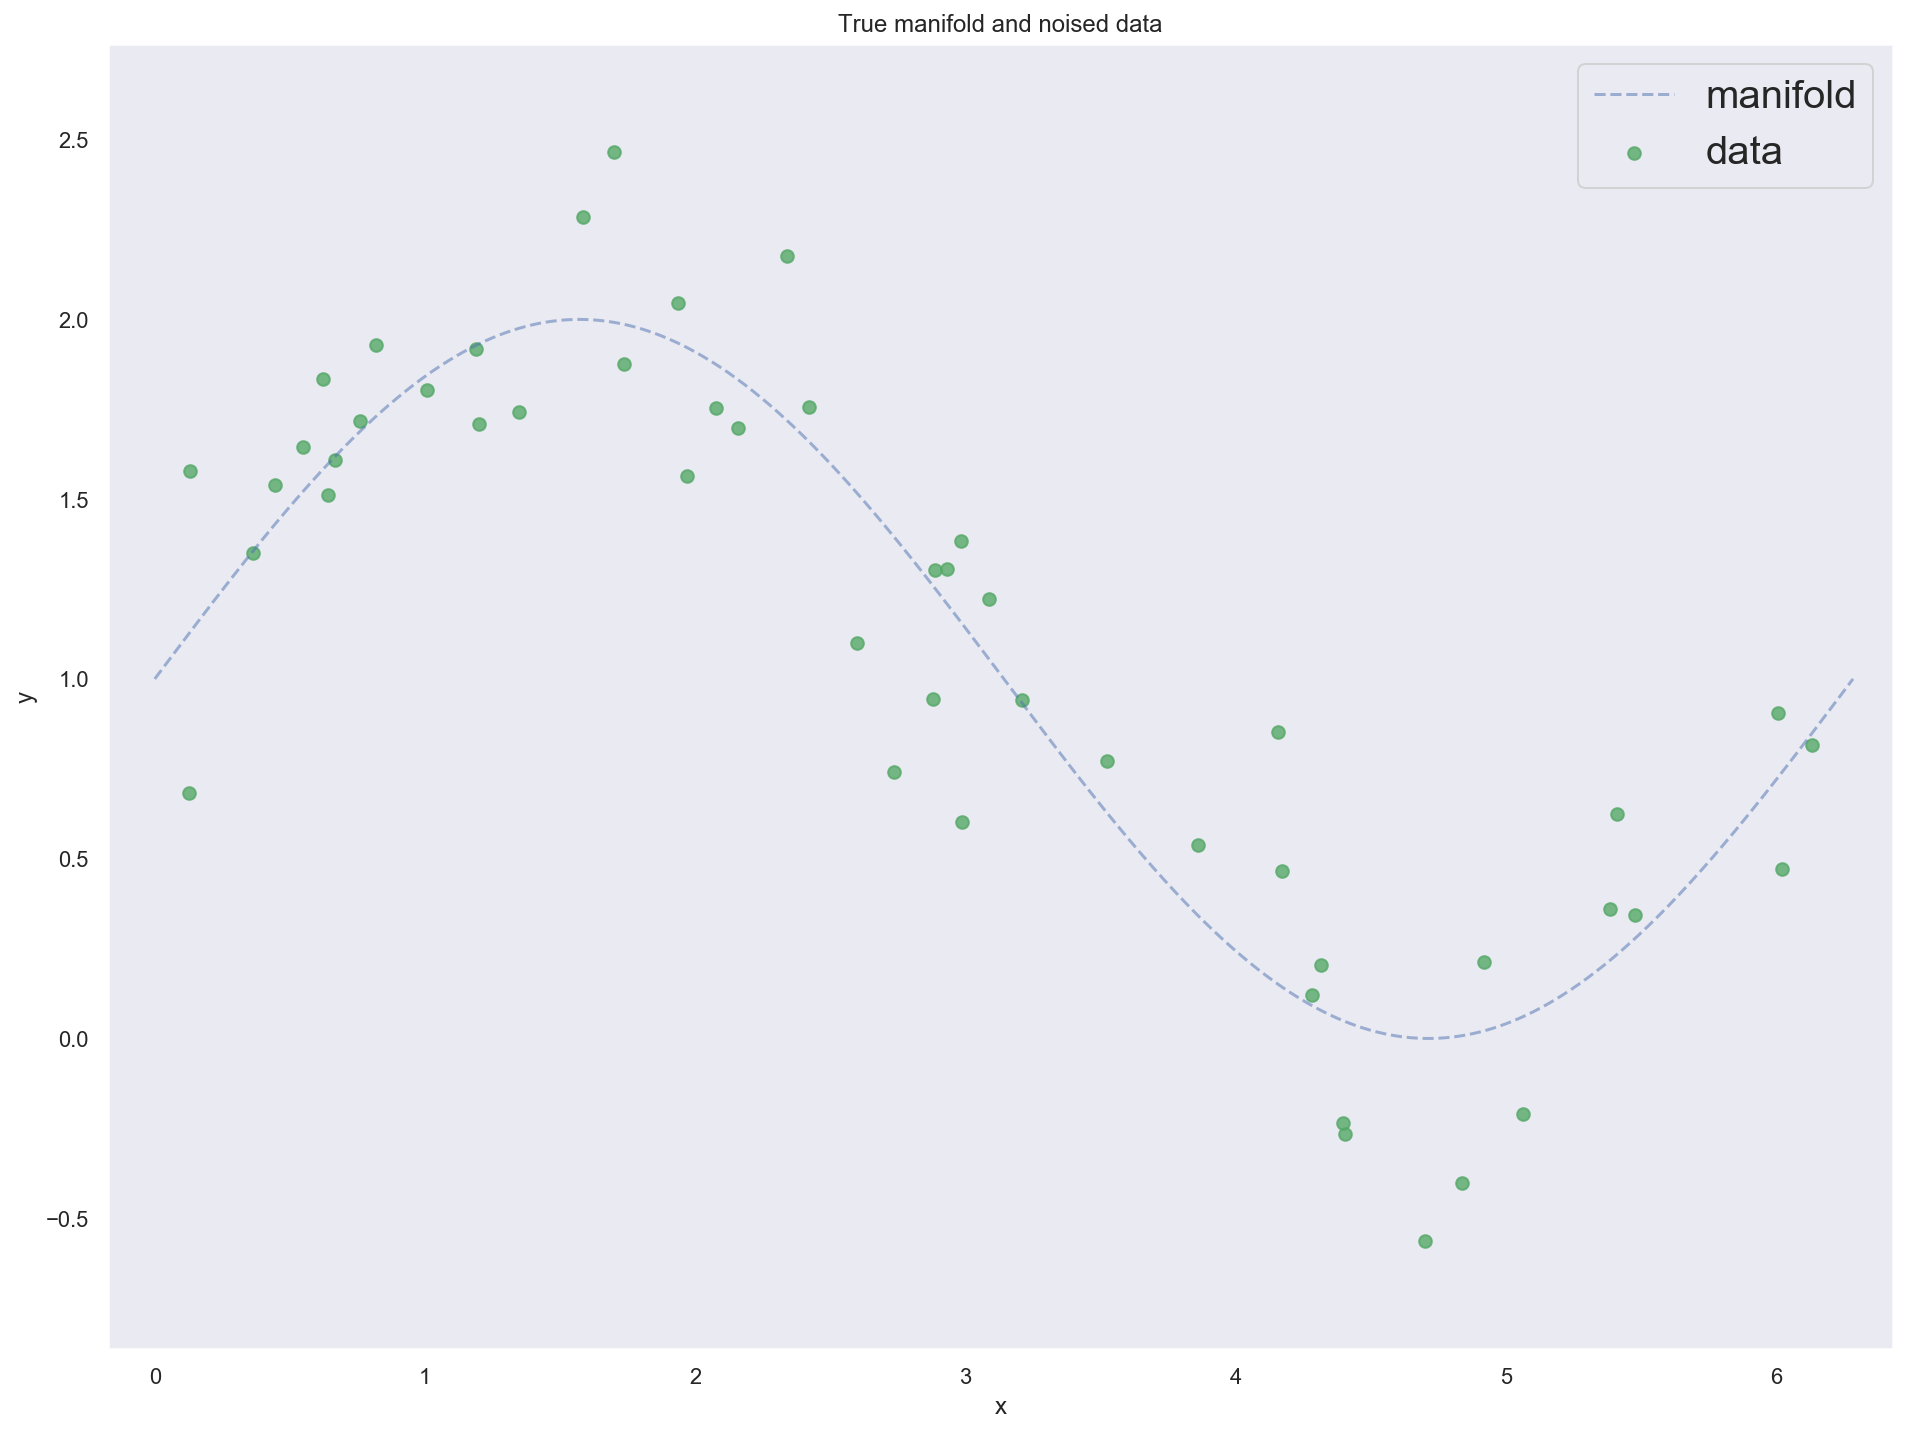

In [5]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

np.random.seed(42)

# sample 50 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 50)

print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Top rows of X
[[1.         0.1257895 ]
 [1.         0.13207897]
 [1.         0.36478954]
 [1.         0.44655271]
 [1.         0.54718431]]
Fitted params
[ 1.99762416 -0.31990588]


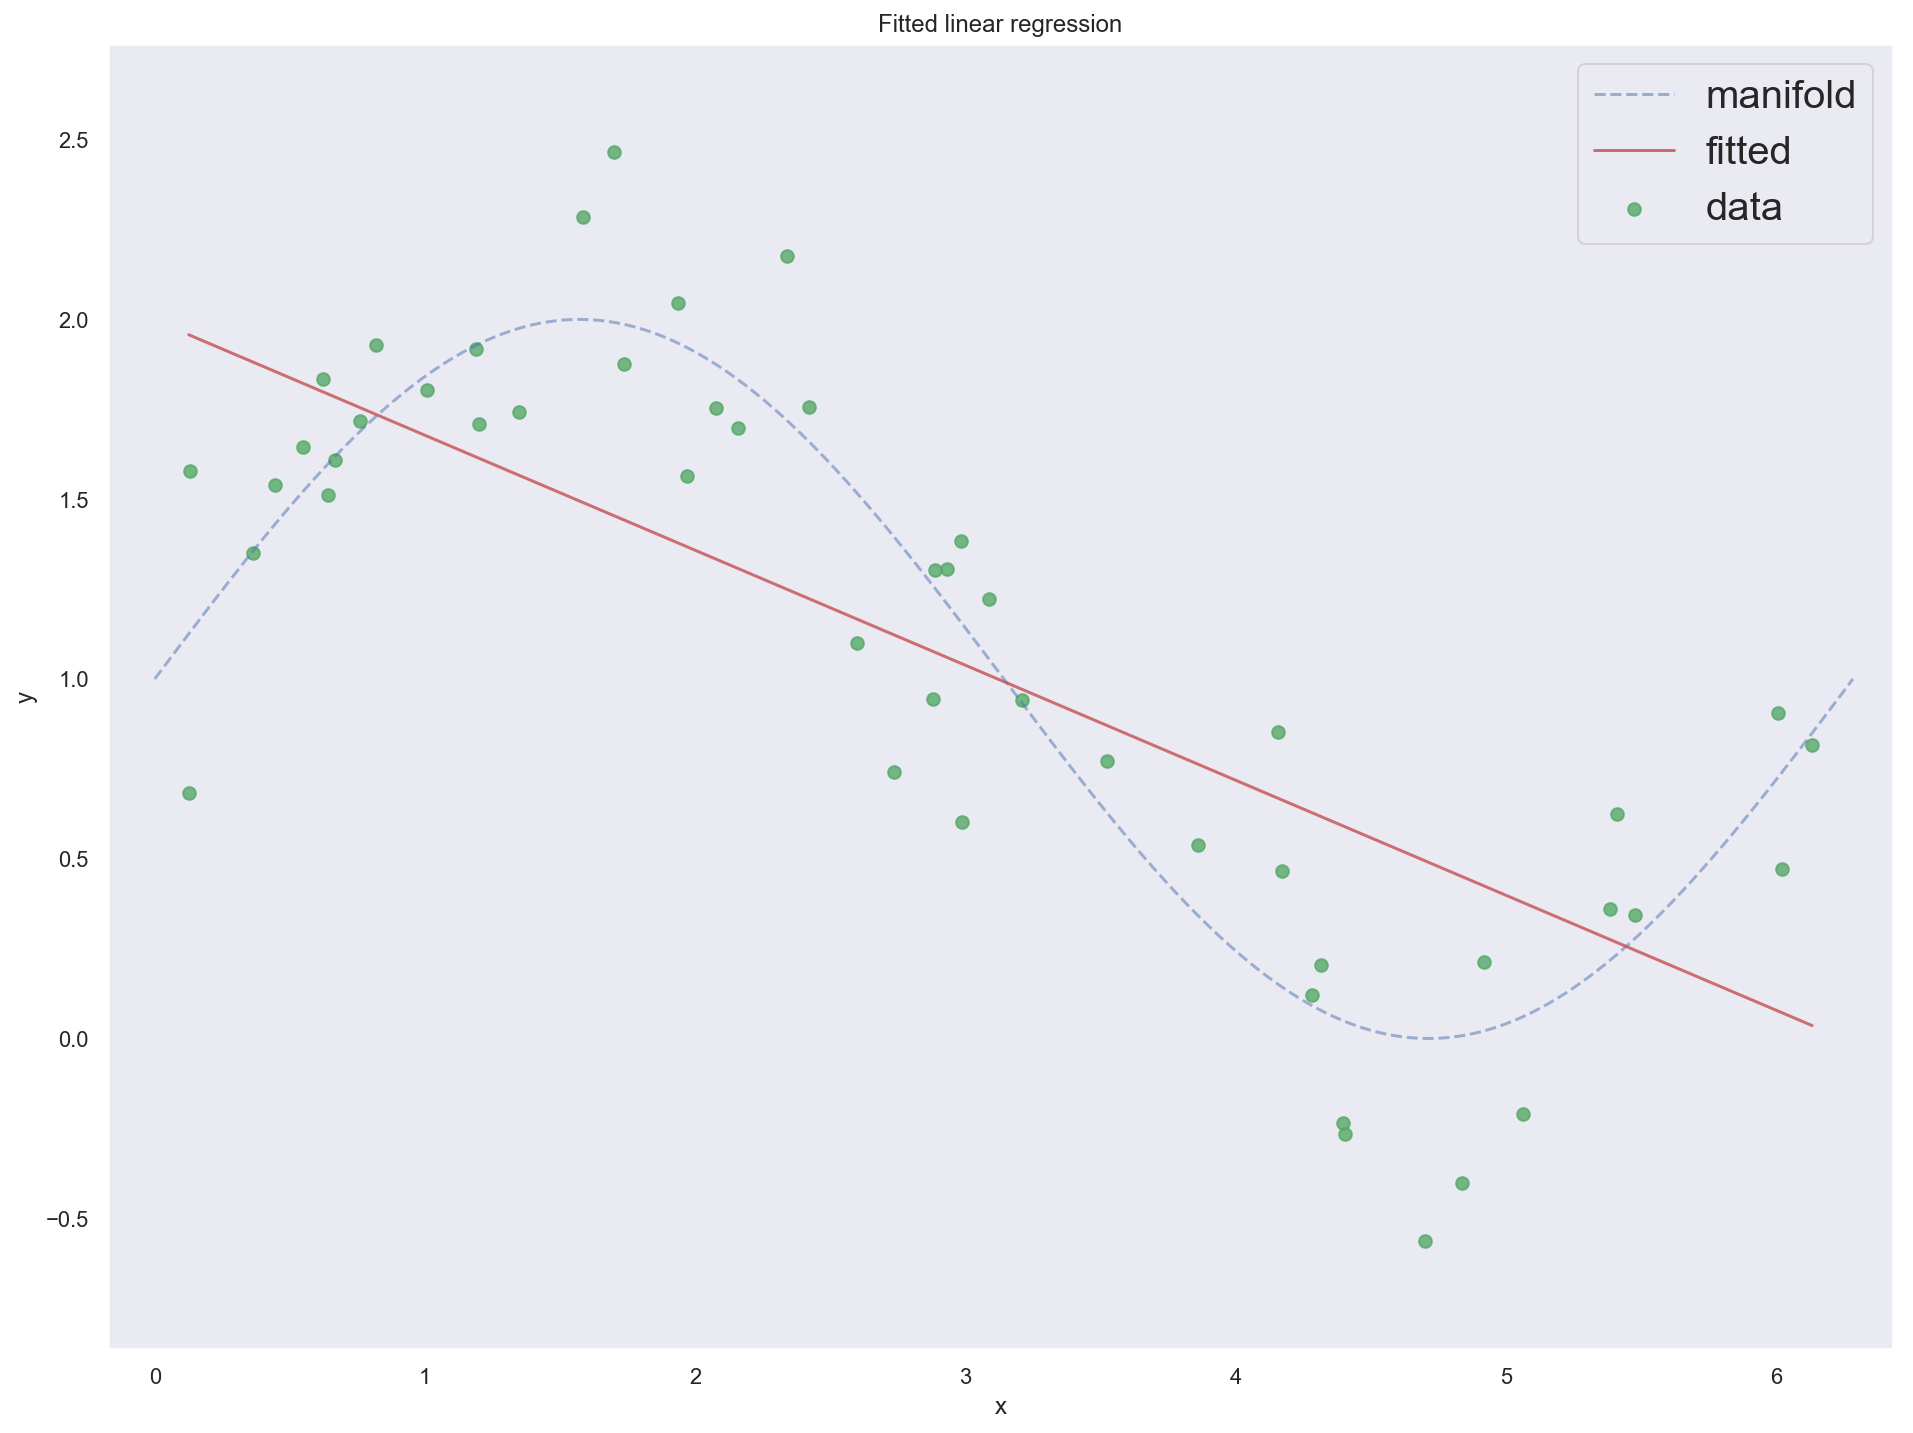

In [6]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print('Fitted params')
print(w)
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- Congratulations, we have implemented a machine learning model in Python.
- Unfortunatelly it is underfitted, or too simple.
- Let's add some complexity to the model.

## Regularized Polynomial Regression

### Polynomial Regression

Lets restrict set of hypothesis such that it would contain all polynomials of degree $\large p$. For number of features $\large m = 1$ hypothesis set is:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

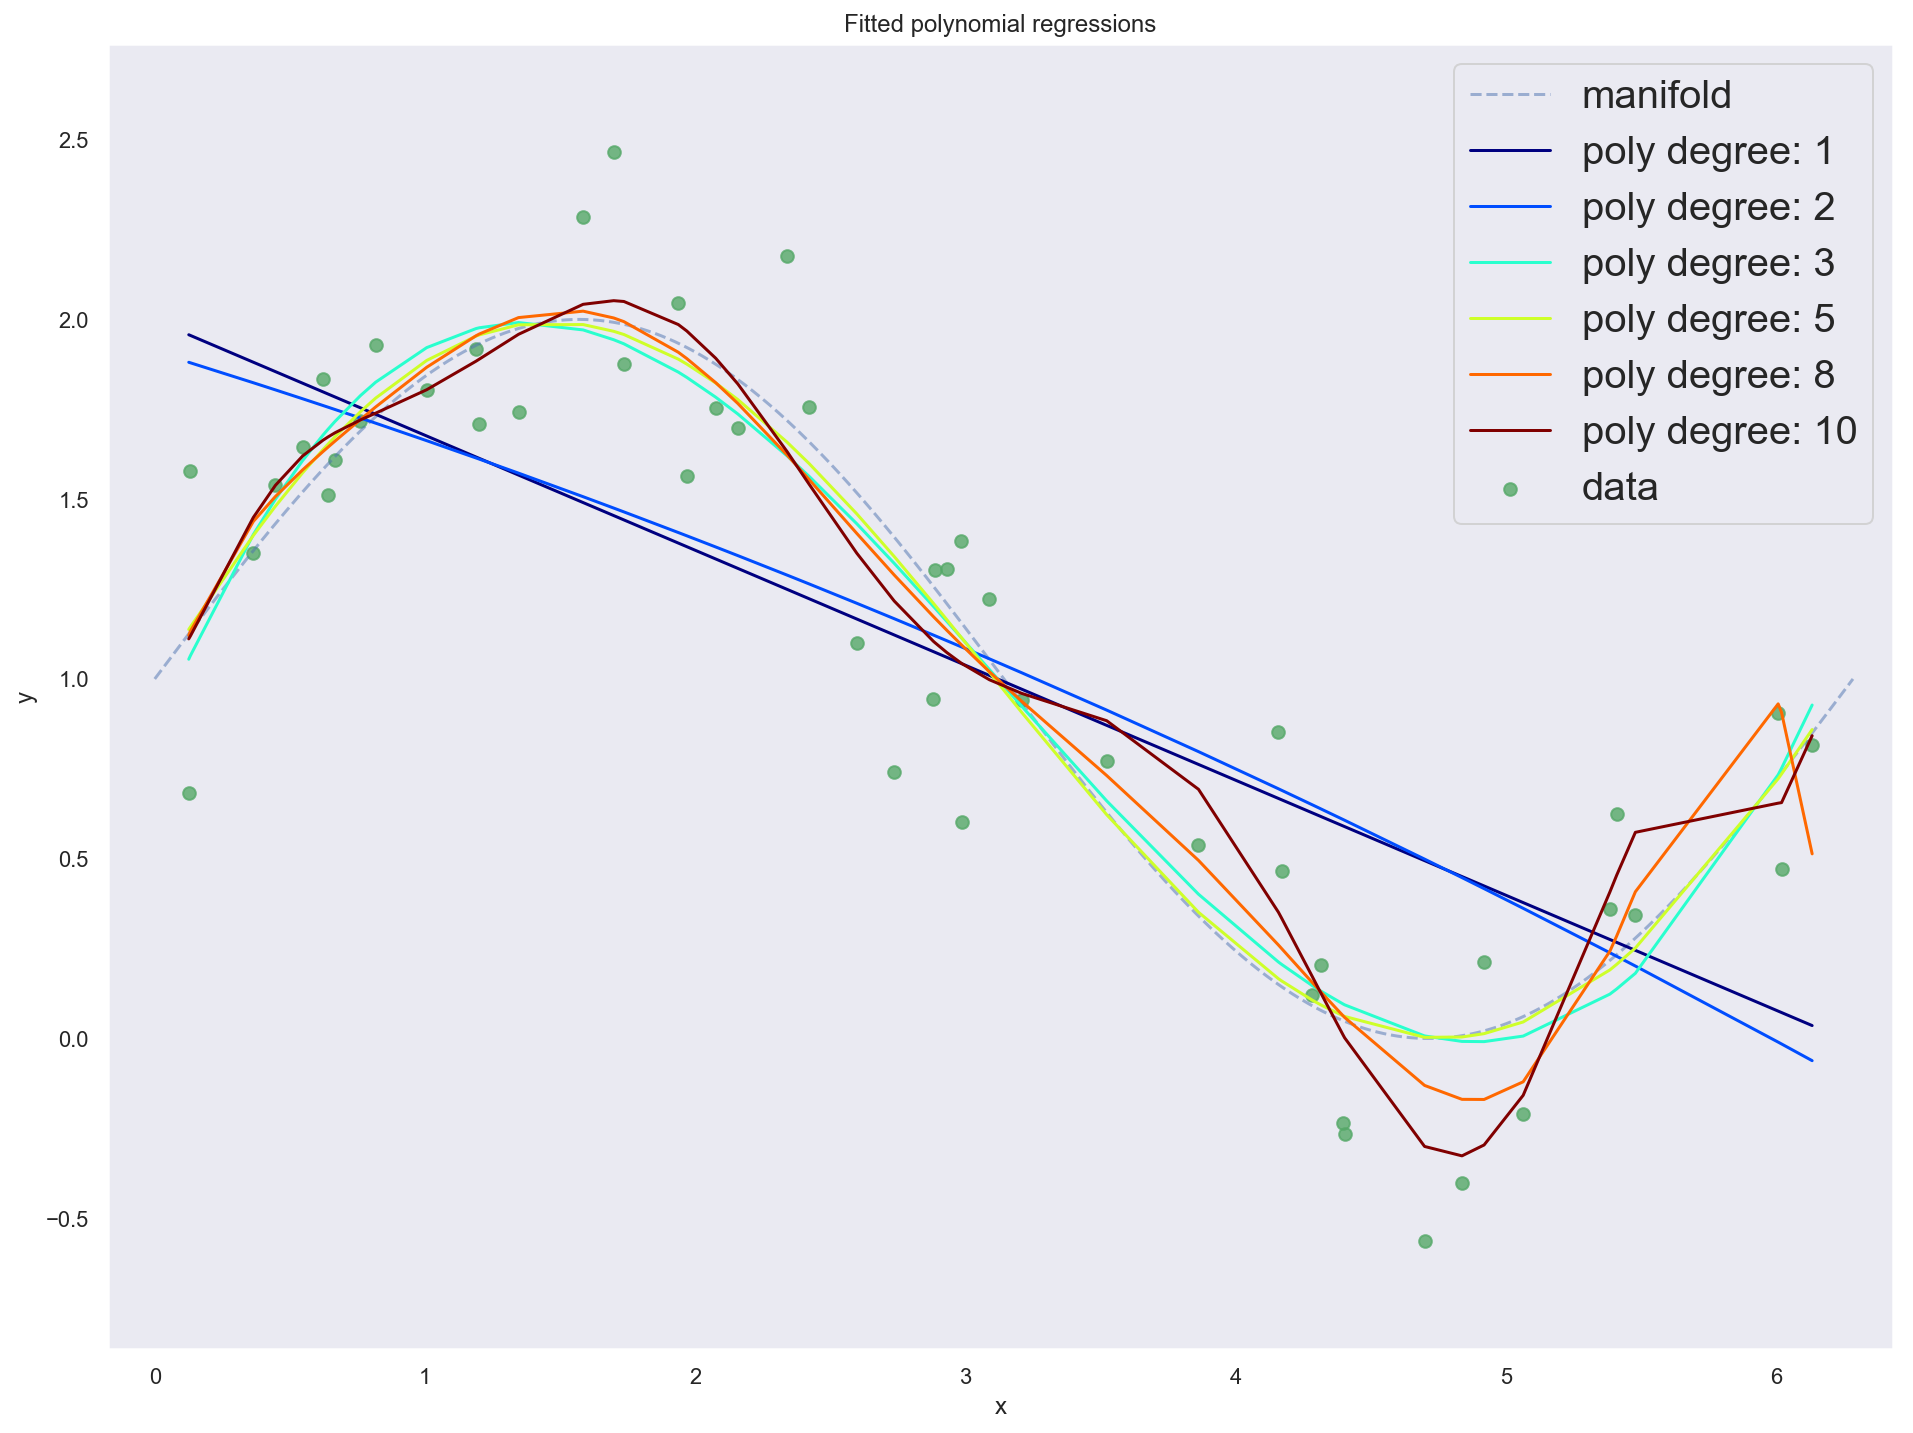

In [7]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 5, 8, 10]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [8]:
for p, e in zip(degree_list, err):
    print('Degree = %i, error = %0.6f' % (p, e))

Degree = 1, error = 0.254570
Degree = 2, error = 0.252805
Degree = 3, error = 0.083297
Degree = 5, error = 0.081846
Degree = 8, error = 0.073612
Degree = 10, error = 0.062394


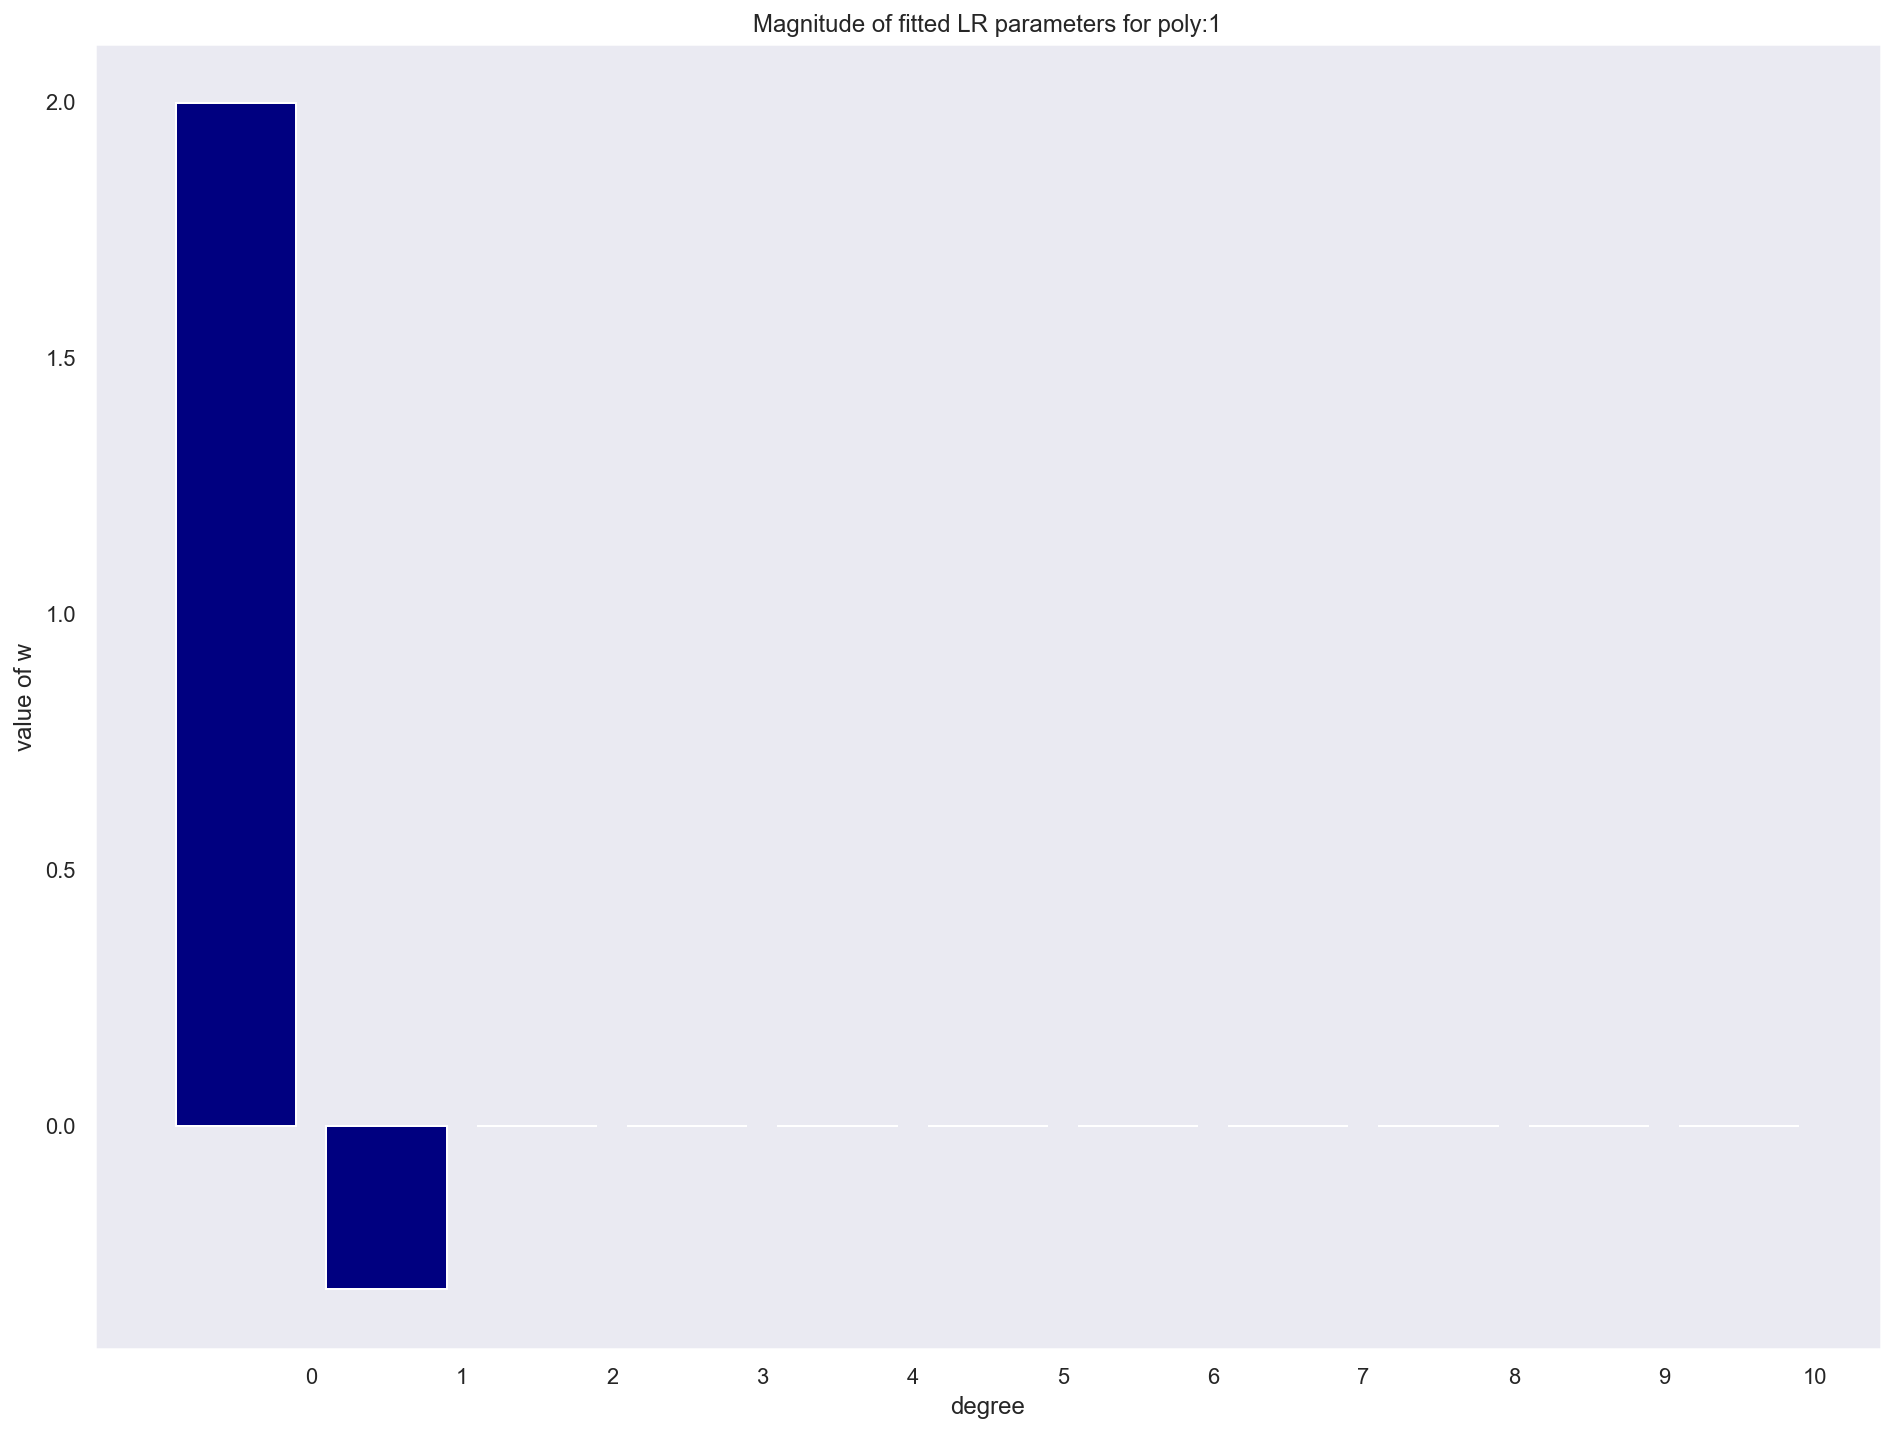

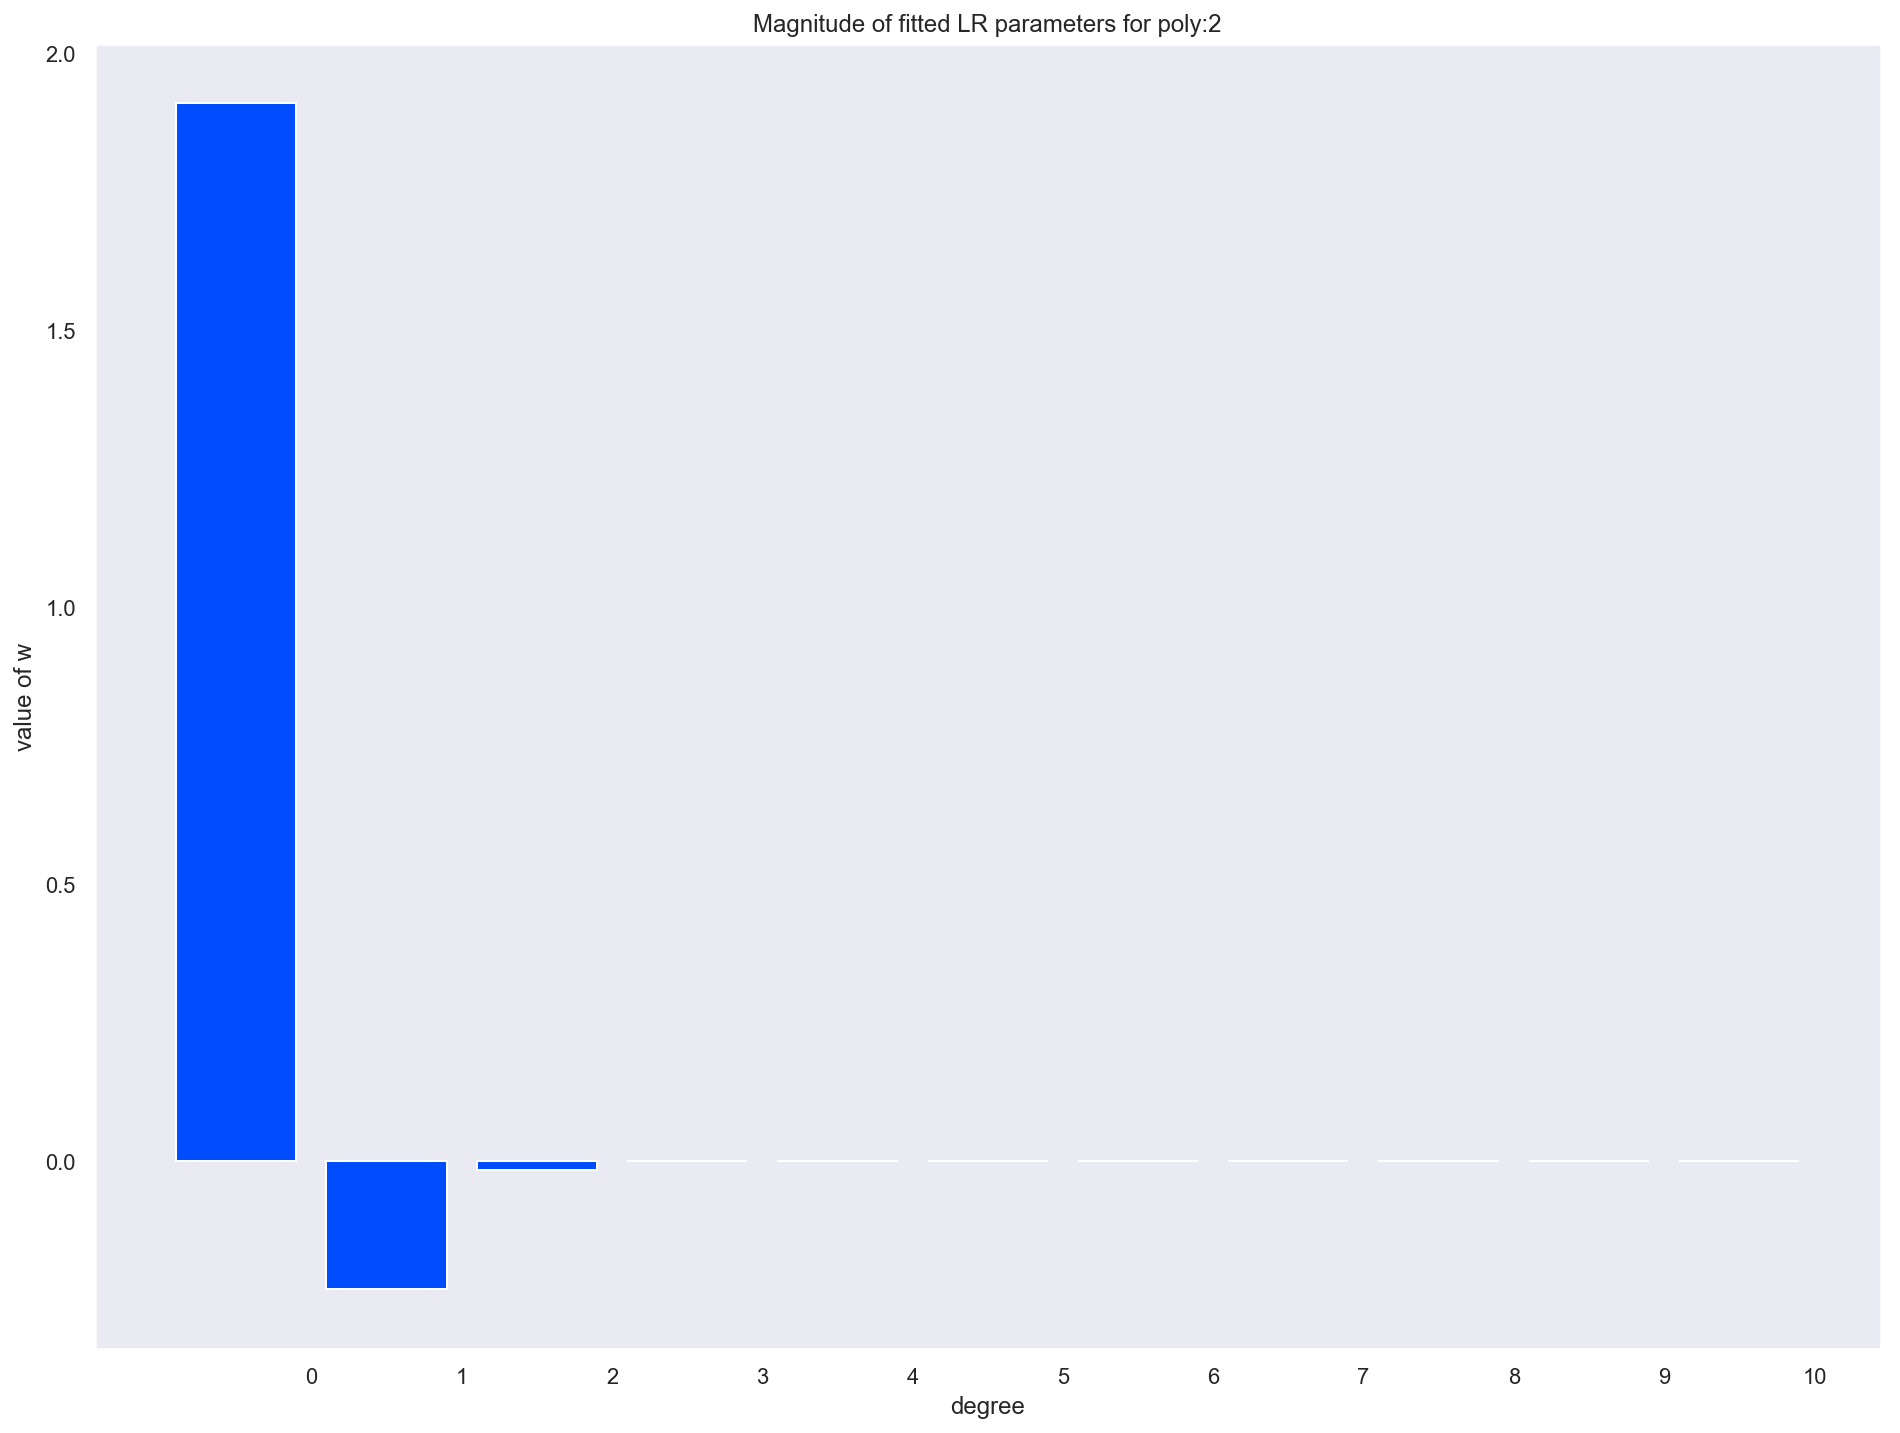

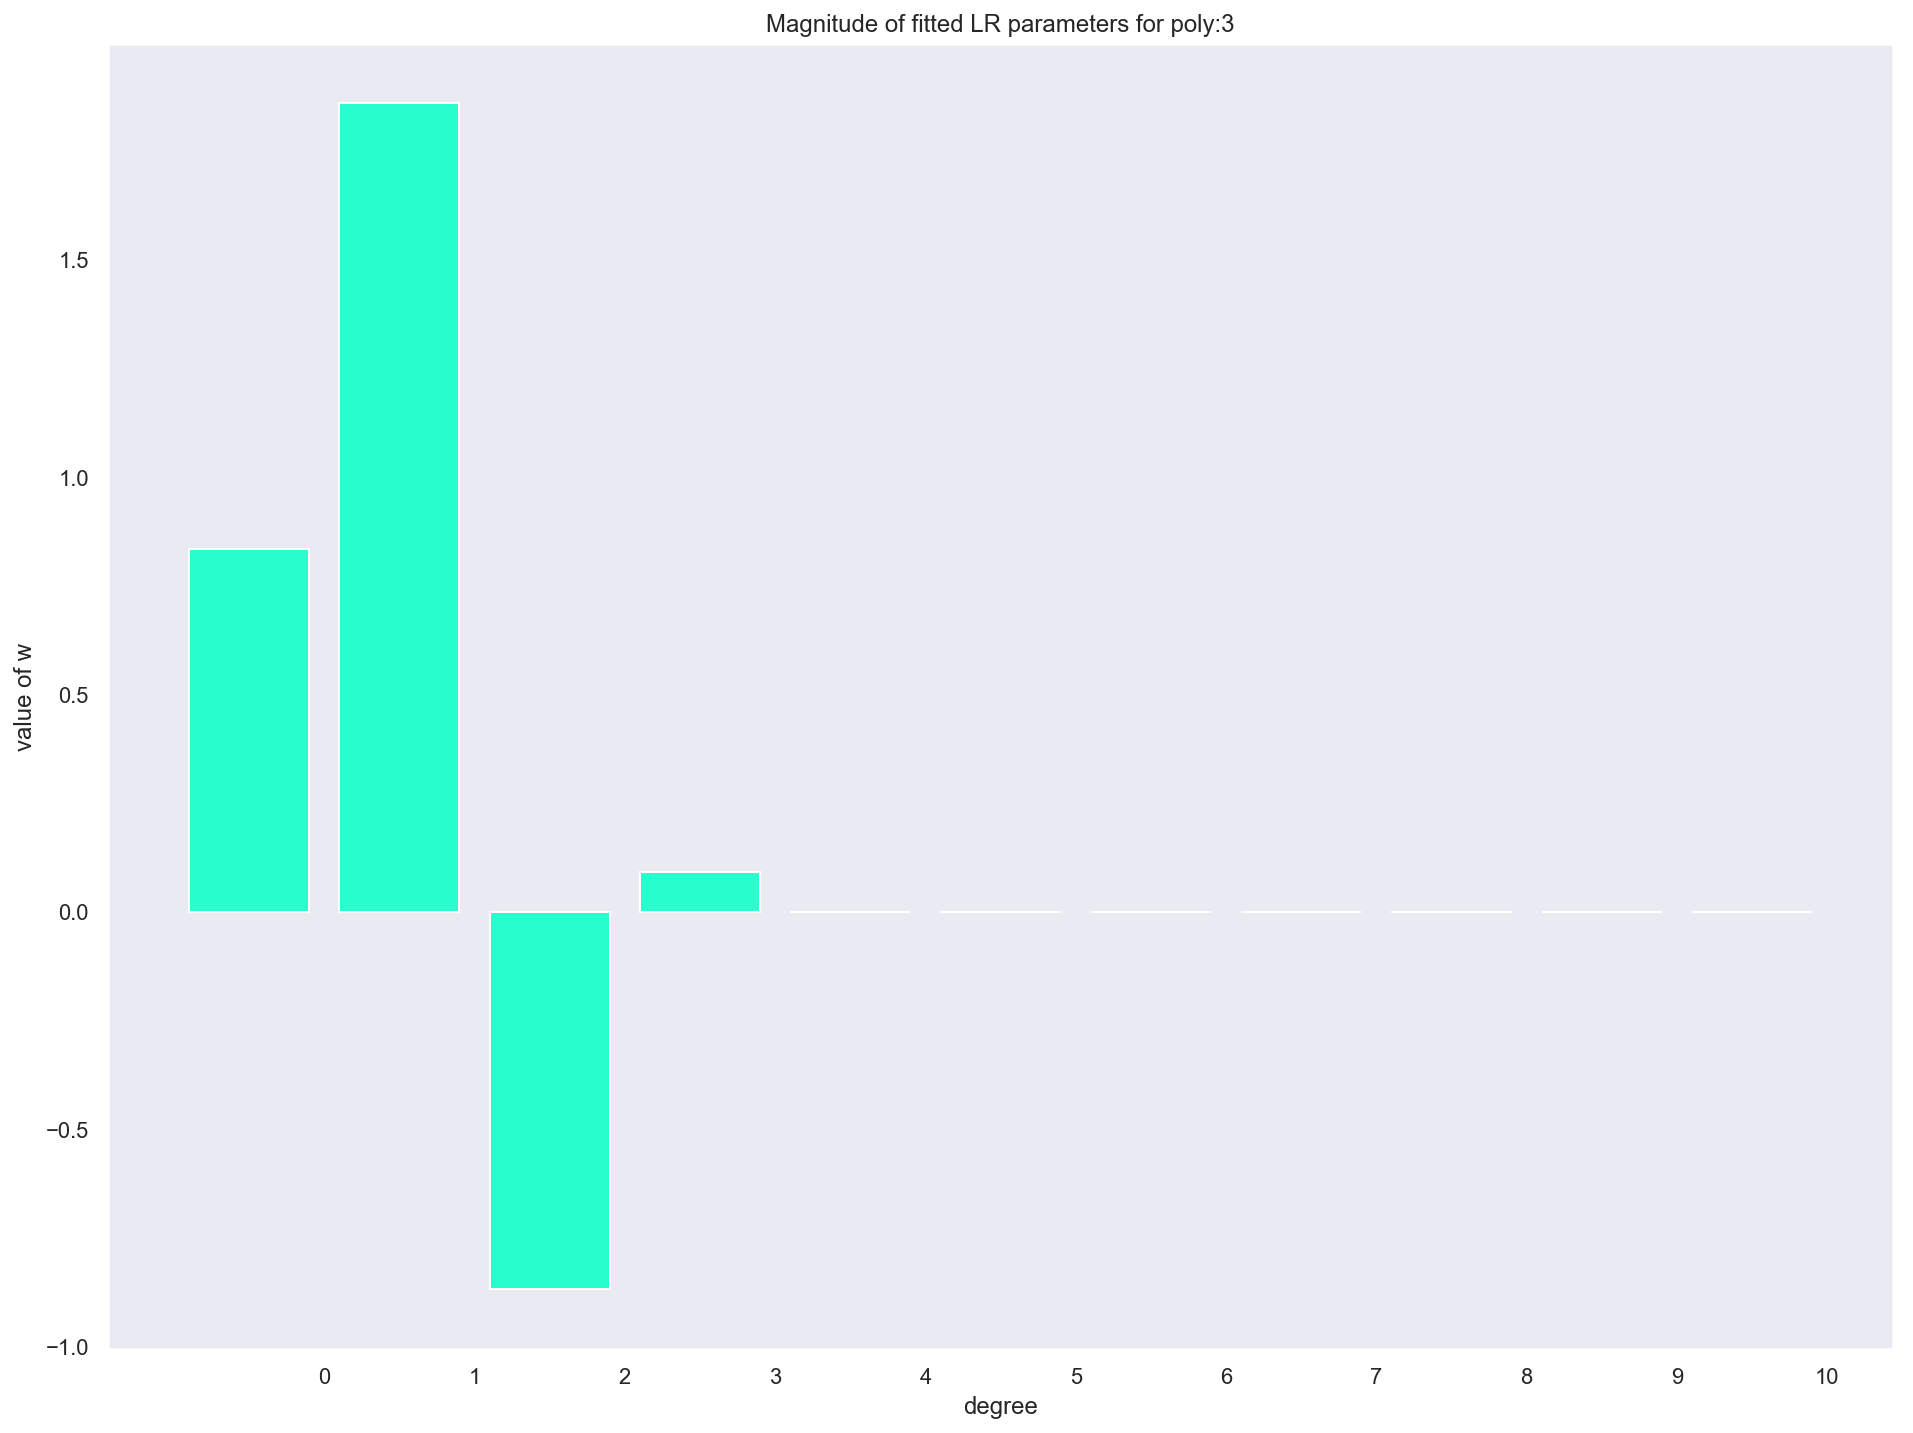

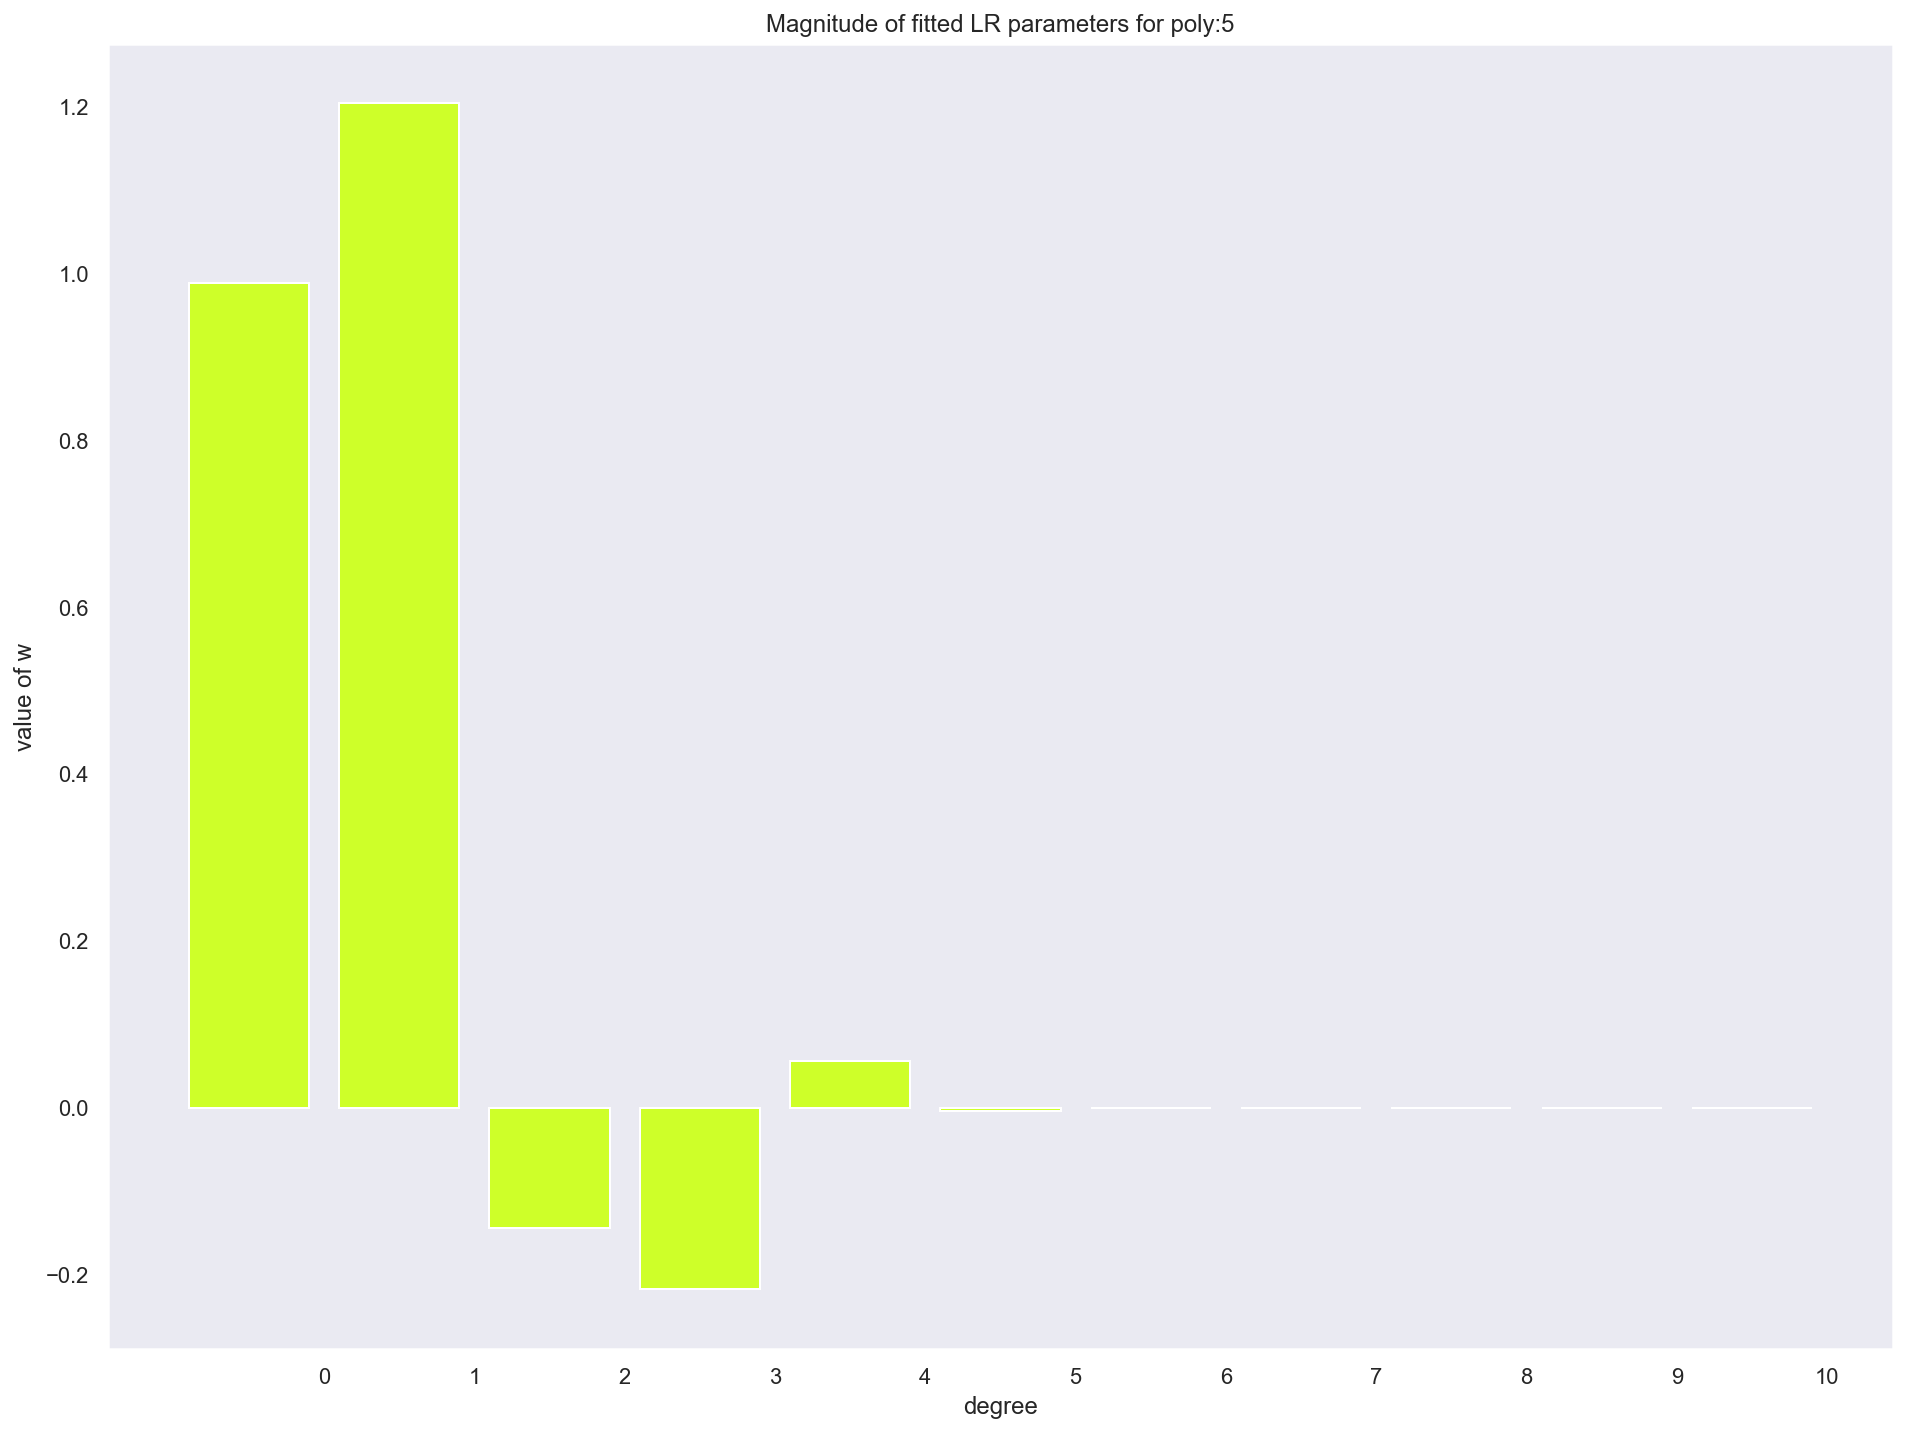

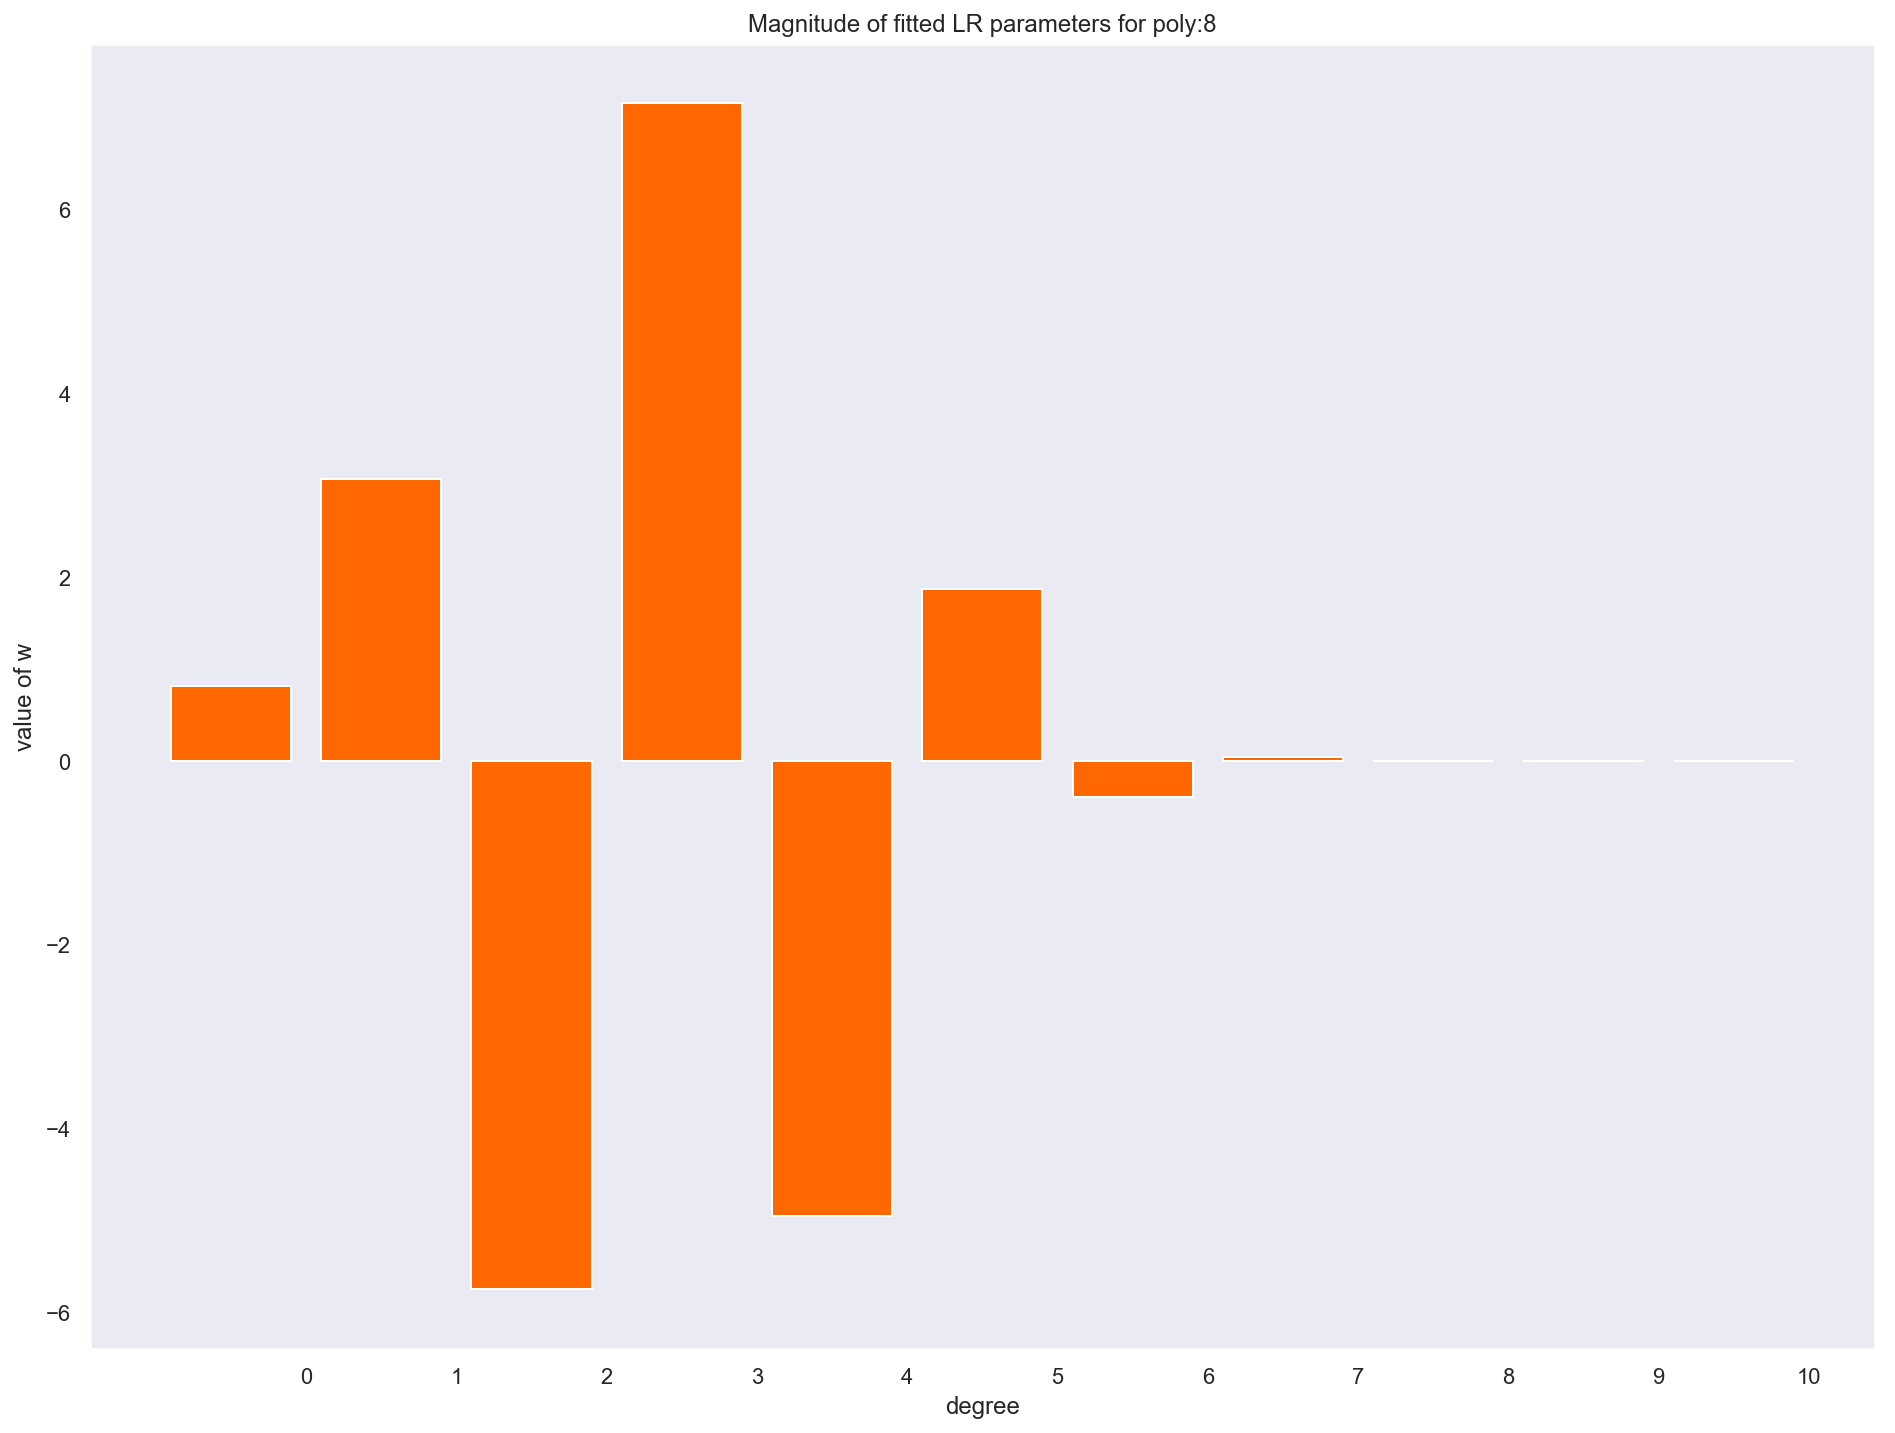

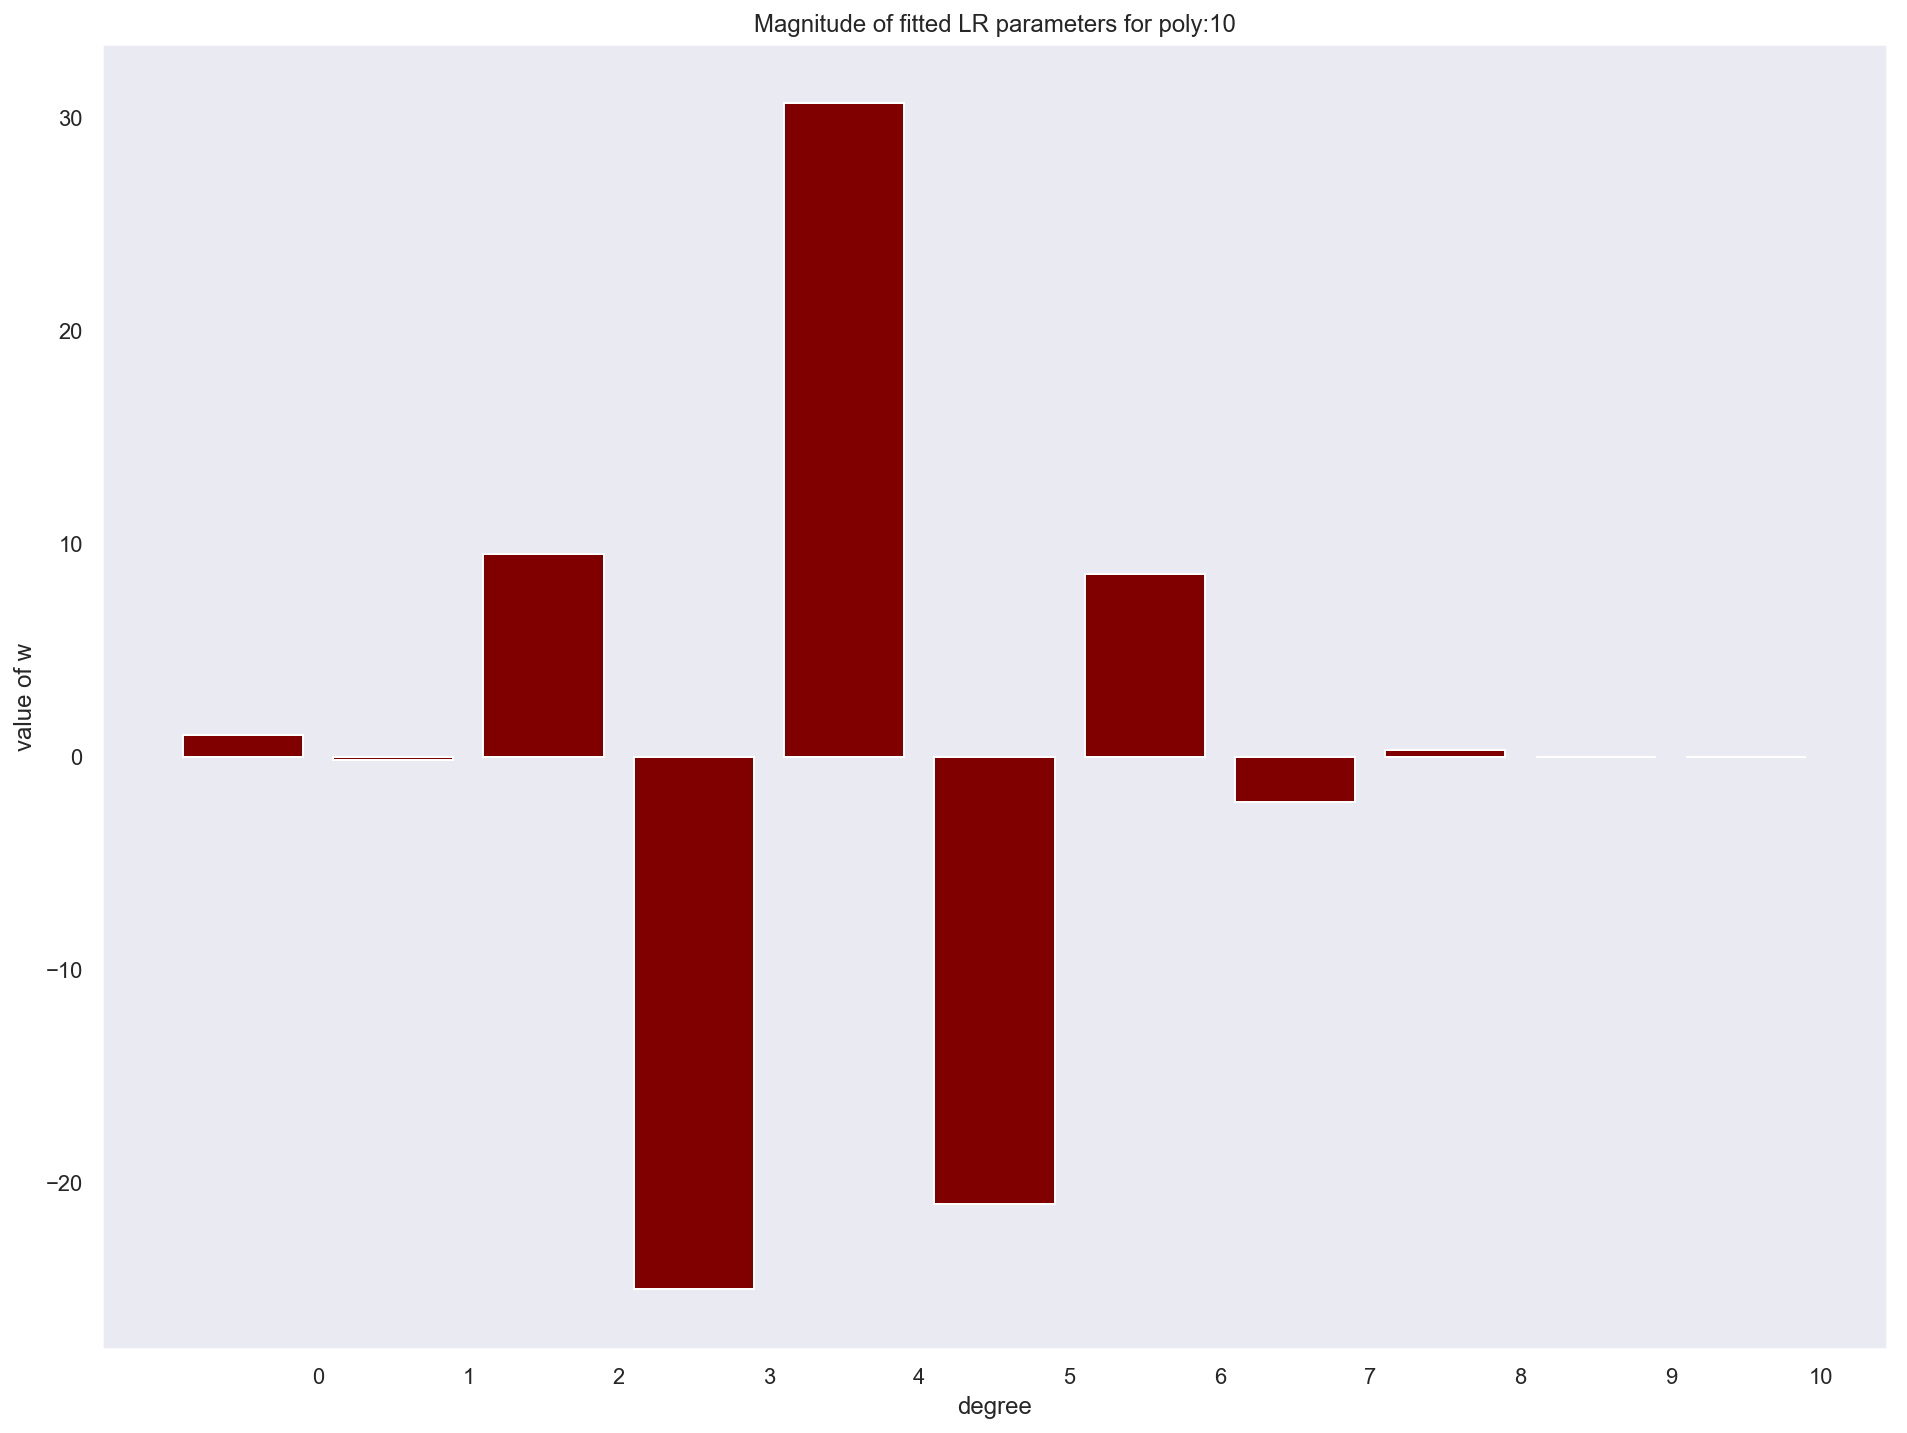

In [39]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

- Cool, we got a complex model, wich performs much better.
- Unfortunatelly it is overfitted.
- Let's remove some complexity from the model using regularization.
- PS: esier is to decrease polynomial degree, but let's foget about this option for demonstration.

### Regularization

We can see one of the symptoms of overfitting: function try to interpolate data (pass throught each point). We can notice that magnitude of weights is increasing with the degree of polynomial. What about to add some penalty term for big weights? So general case of regularization with penalty term is:
$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
where:
* $\large \lambda$ is regularization parameter

#### L2 / Ridge

Let's penalize for large L2 norm of the weights vector:
$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$
then new objective will be:
$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \frac{\lambda}{2} \sum_{j=1}^m w_j^2$$

#### L1 / LASSO

Let's penalize for large L1 norm of the weights vector:
$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$
then new objective will be:
$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

#### Elastic Net Regularization

Now let's penalize for large weighted sum of L1 and L2 norms of the weights vector:
$$\large R\left(\vec{w}\right) = \alpha \sum_{j=1}^m \left| w_j \right| + \left(1 - \alpha\right) \frac{1}{2} \sum_{j=1}^m w_j^2$$

and the new objective is:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \alpha \lambda \sum_{j=1}^m \left| w_j \right| + \left(1 - \alpha\right) \frac{\lambda}{2} \sum_{j=1}^m w_j^2$$

## Gradient Descent Algorithm

Let's try to follow a previous idea:
- take a derivative of the loss function with respect to parameters of the model;
- equal it to zero and find the extremum point;

$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \alpha \lambda \cdot \color{red}{\text{sign}(\color{black}{w_j})} + \left(1 - \alpha\right) \lambda w_j$$

- unfortunatelly we cannot find a closed form solution to this problem;
- but there is a solution - Gradient Descent Algorithm

Basic idea:
- gradient of a function wrt parametes is a direction and rate of fastest increase of of that function in the space of parameters;
<img src='./../../img/Gradient2.svg.png' width='50%'/>
- so the negative gradient is a direction and rate of fastest **decrease** of of the function
<img src='https://habrastorage.org/files/4f2/75d/a46/4f275da467a44fc4a8d1a11007776ed2.jpg' width=50%>
- let's follow negative direction of the gradient untill we reach a local minima
<img src='./../../img/Neural-network-32-i2tutorials.png' />
- we will aproach local minima step by step to avoid _jumping off_ from the minima
<img src='./../../img/lr-types.png' />

GD Algorithm:

```python
for _ in range(n_iterations):
    params_grad = evaluate_gradient(loss_function, data, params)
    params = params - learning_rate * params_grad
    if is_in_local_minima():
        break
```

or same in mathematical notation:

$$\large \vec{w}_\text{new} = \vec{w}_\text{old} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \vec{w}}$$

Now let's try to apply GD algorithm for fitting and fixing polynomial refression of 10th degree.

In [9]:
degree = 10
dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T
print('X.shape = ', X.shape)
y = data['y_train']
print('y.shape = ', y.shape)

X.shape =  (50, 11)
y.shape =  (50,)


In [11]:
# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.0000001
# regularization parameter
lmbd = 1
# weight of L1
alpha = 0.5

# we will keep all MSE values to plot graph
loss = [
    ((np.dot(X, w.T) - y)**2).sum()/(2*X.shape[0]) + alpha*lmbd*np.abs(w).sum() + (1 - alpha)*lmbd*(w**2).sum()
]

for _ in range(n_iter):
    grad = np.dot((np.dot(X, w.T) - y), X)/X.shape[0] + alpha*lmbd*np.sign(w) + (1 - alpha)*lmbd*w
    w -= lr*grad
    loss.append(
        ((np.dot(X, w.T) - y)**2).sum()/(2*X.shape[0]) + alpha*lmbd*np.abs(w).sum() + (1 - alpha)*lmbd*(w**2).sum()
    )

In [12]:
loss

[217316273382711.4,
 2.0850251291524485e+29,
 2.0006123391244106e+44,
 1.919617023074119e+59,
 1.8419008236691632e+74,
 1.7673309850108306e+89,
 1.695780125857841e+104,
 1.6271260220319236e+119,
 1.5612513976327718e+134,
 1.4980437247057076e+149,
 1.4373950310198549e+164,
 1.3792017156284654e+179,
 1.3233643718963353e+194,
 1.2697876176919948e+209,
 1.218379932454623e+224,
 1.1690535008573432e+239,
 1.1217240627998526e+254,
 1.0763107694741428e+269,
 1.0327360452574344e+284,
 9.909254551964124e+298,
 inf]

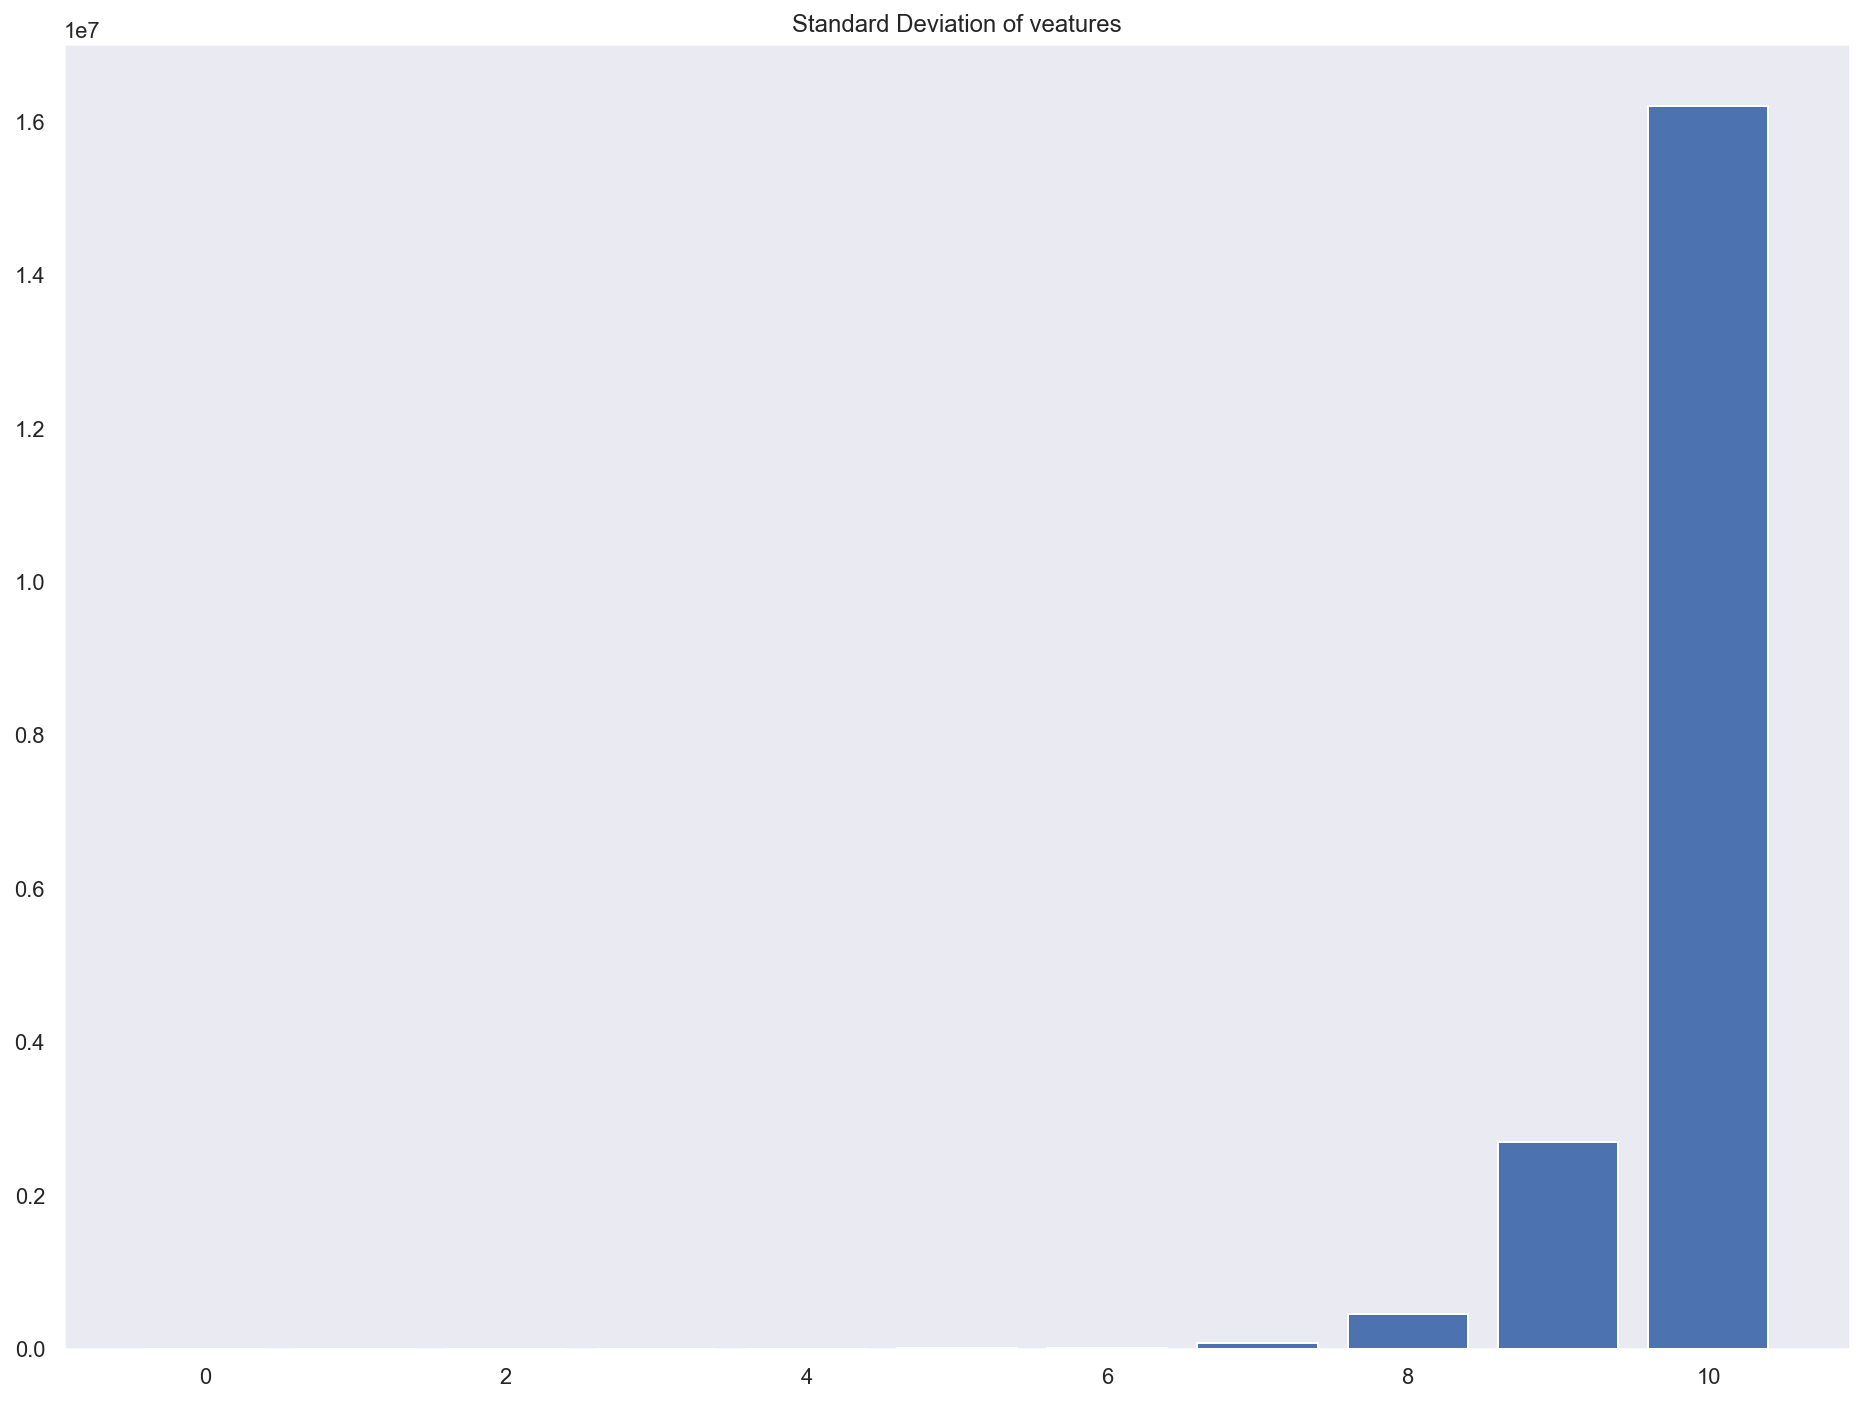

In [13]:
plt.bar(range(len(w)), X.std(axis=0))
plt.title('Standard Deviation of veatures')
plt.show()

### Standardization 

To avoid divergence and make magnitude of gradients to be at the same scale we can remove the mean from each feature and scale them to unit variance. First we need to compute sample mean and sample standard deviation of the training set:
$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$
Then apply transformation:
$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

In [14]:
X_mean = X[:, 1:].mean(axis=0)
X_std = X[:, 1:].std(axis=0)
X[:, 1:] = (X[:, 1:] - X_mean)/X_std

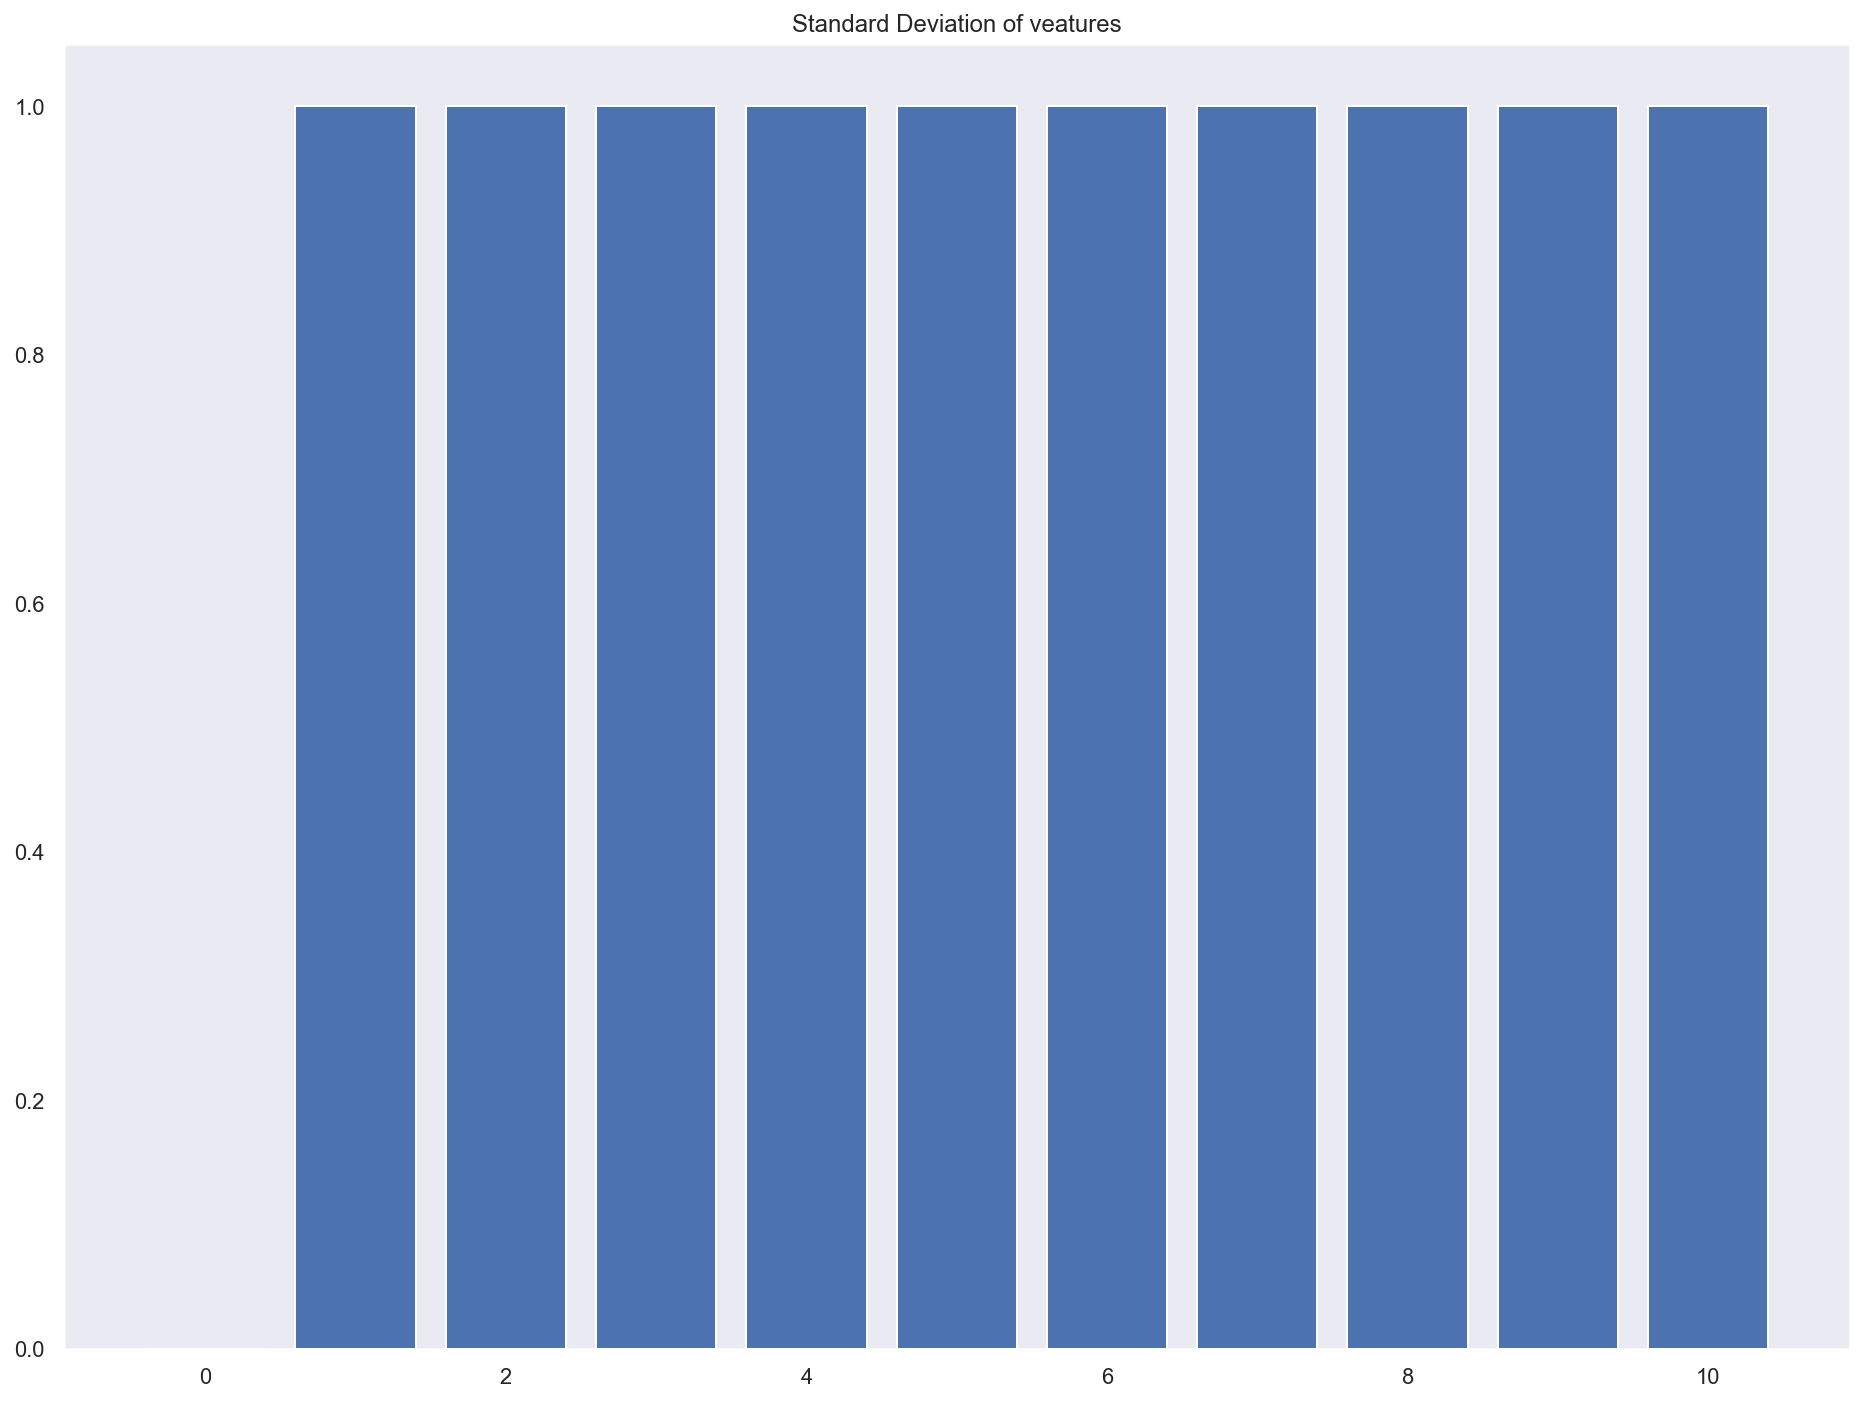

In [15]:
plt.bar(range(len(w)), X.std(axis=0))
plt.title('Standard Deviation of veatures')
plt.show()

In [16]:
np.random.seed(42)
# initial weights of the model
w = np.random.normal(0, 1, size=X.shape[1])
# maximim number of iterations
n_iter = 1500
# alpha or learning rate
lr = 0.15
# we will keep all MSE values to plot graph
loss = []
# regularization parameter
lmbd = 1.0
# weight of L1
alpha = 0.05

for _ in range(n_iter):
    grad0 = np.dot((np.dot(X, w.T) - y), X)[0]/X.shape[0]
    grad1 = np.dot((np.dot(X, w.T) - y), X)[1:]/X.shape[0] + alpha*lmbd*np.sign(w[1:]) + (1 - alpha)*lmbd*w[1:]
    grad = np.hstack([grad0, grad1])
    w -= lr*grad
    loss.append(
        ((np.dot(X, w.T) - y)**2).sum()/(2*X.shape[0]) + alpha*lmbd*np.abs(w).sum() + (1 - alpha)*lmbd*(w**2).sum()
    )

In [17]:
loss[-10:]

[1.4098275759465086,
 1.4084895477408608,
 1.4090250398755468,
 1.4070006407493574,
 1.4085170957165858,
 1.4080776374795332,
 1.4101085685458883,
 1.4077686602250672,
 1.410345693798781,
 1.4076461705538852]

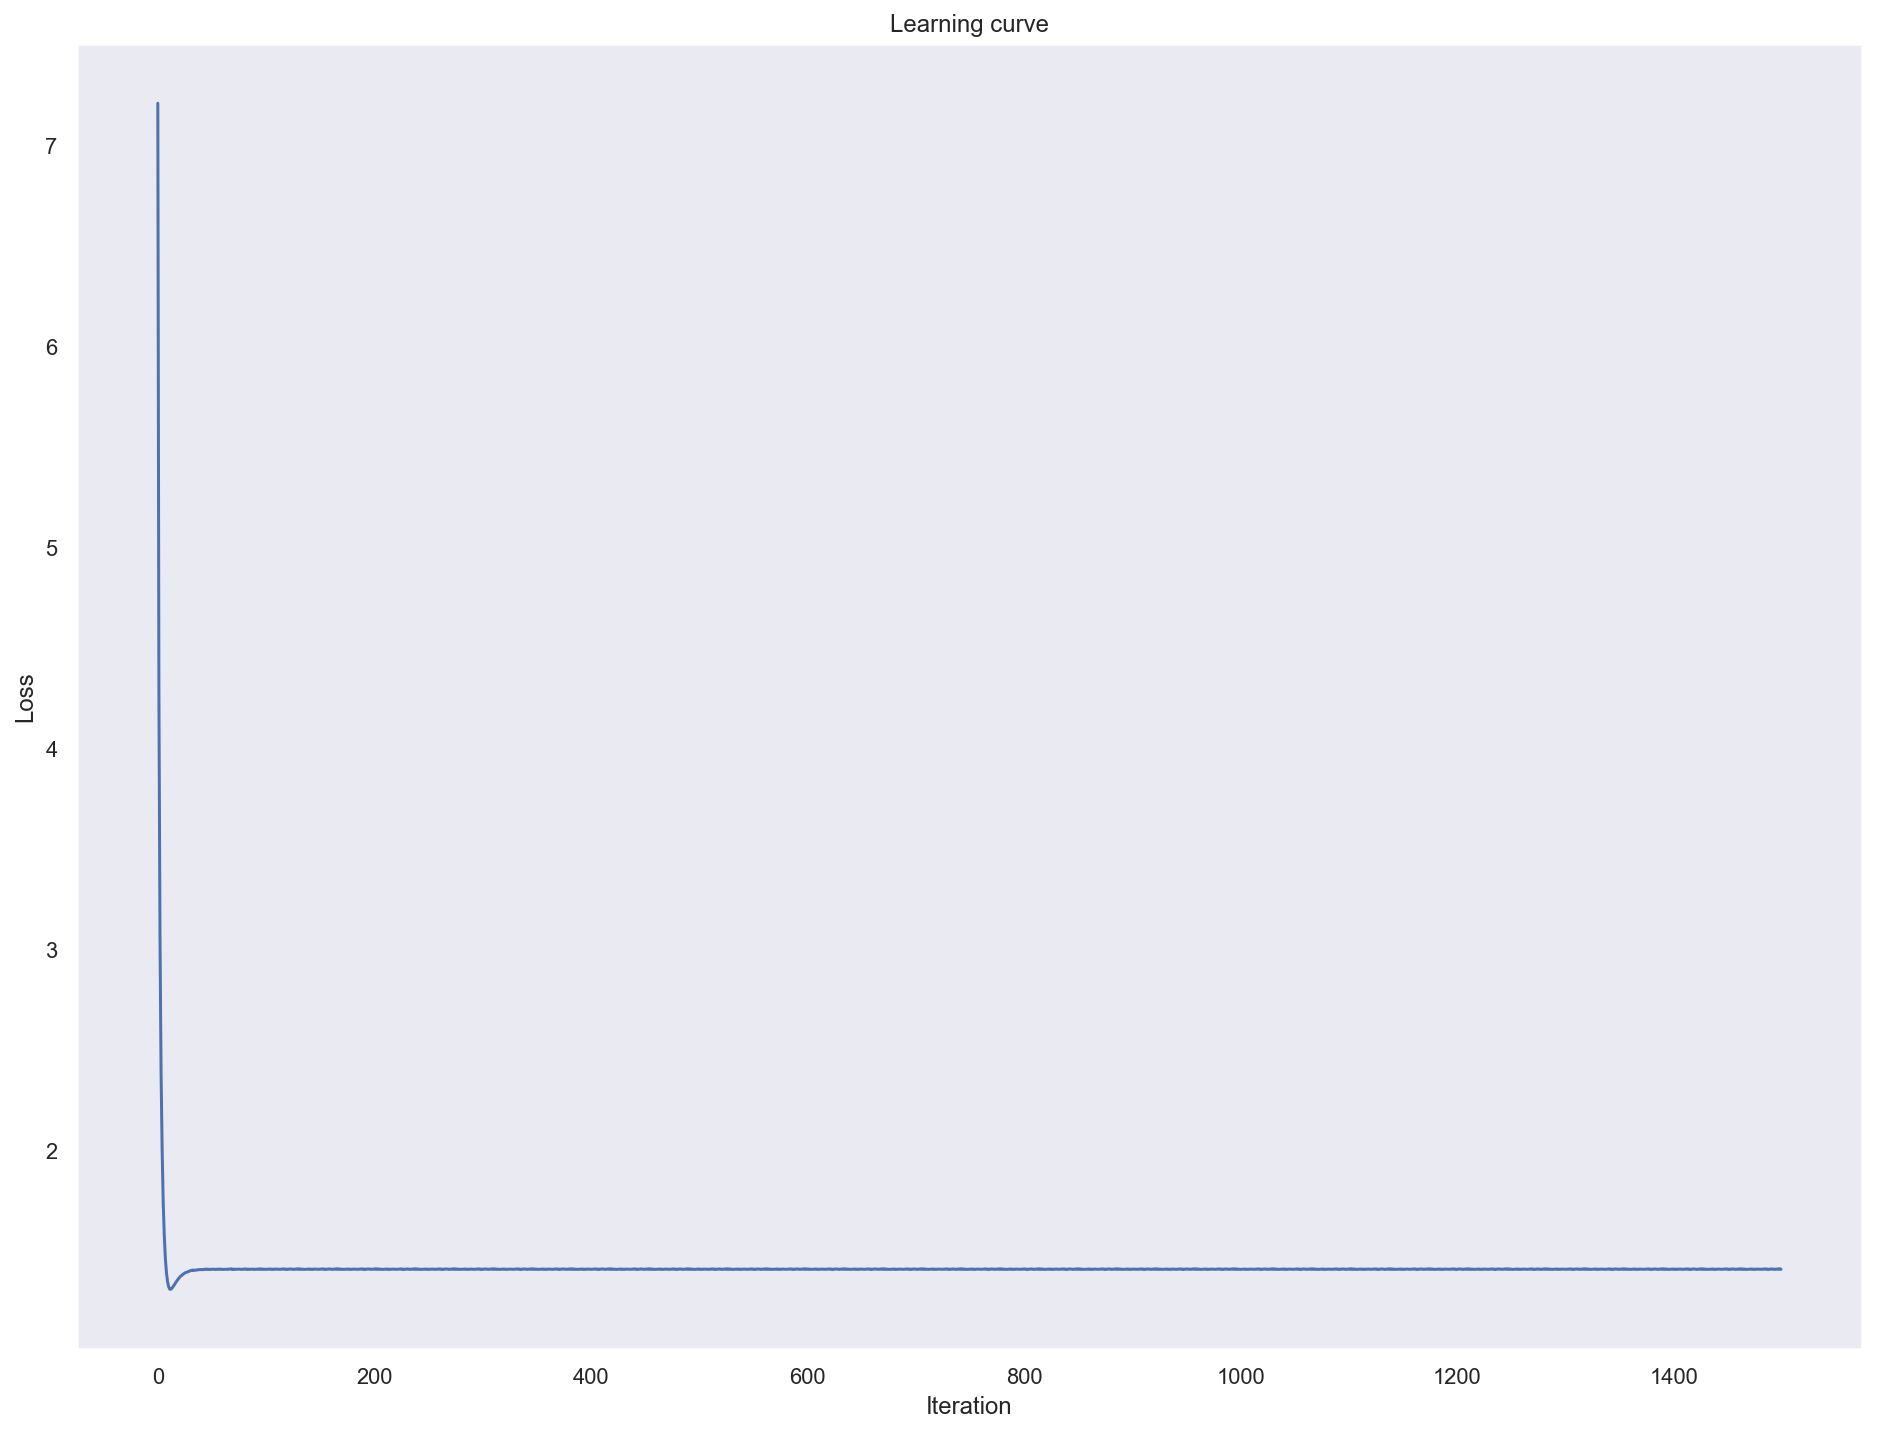

In [18]:
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.show()

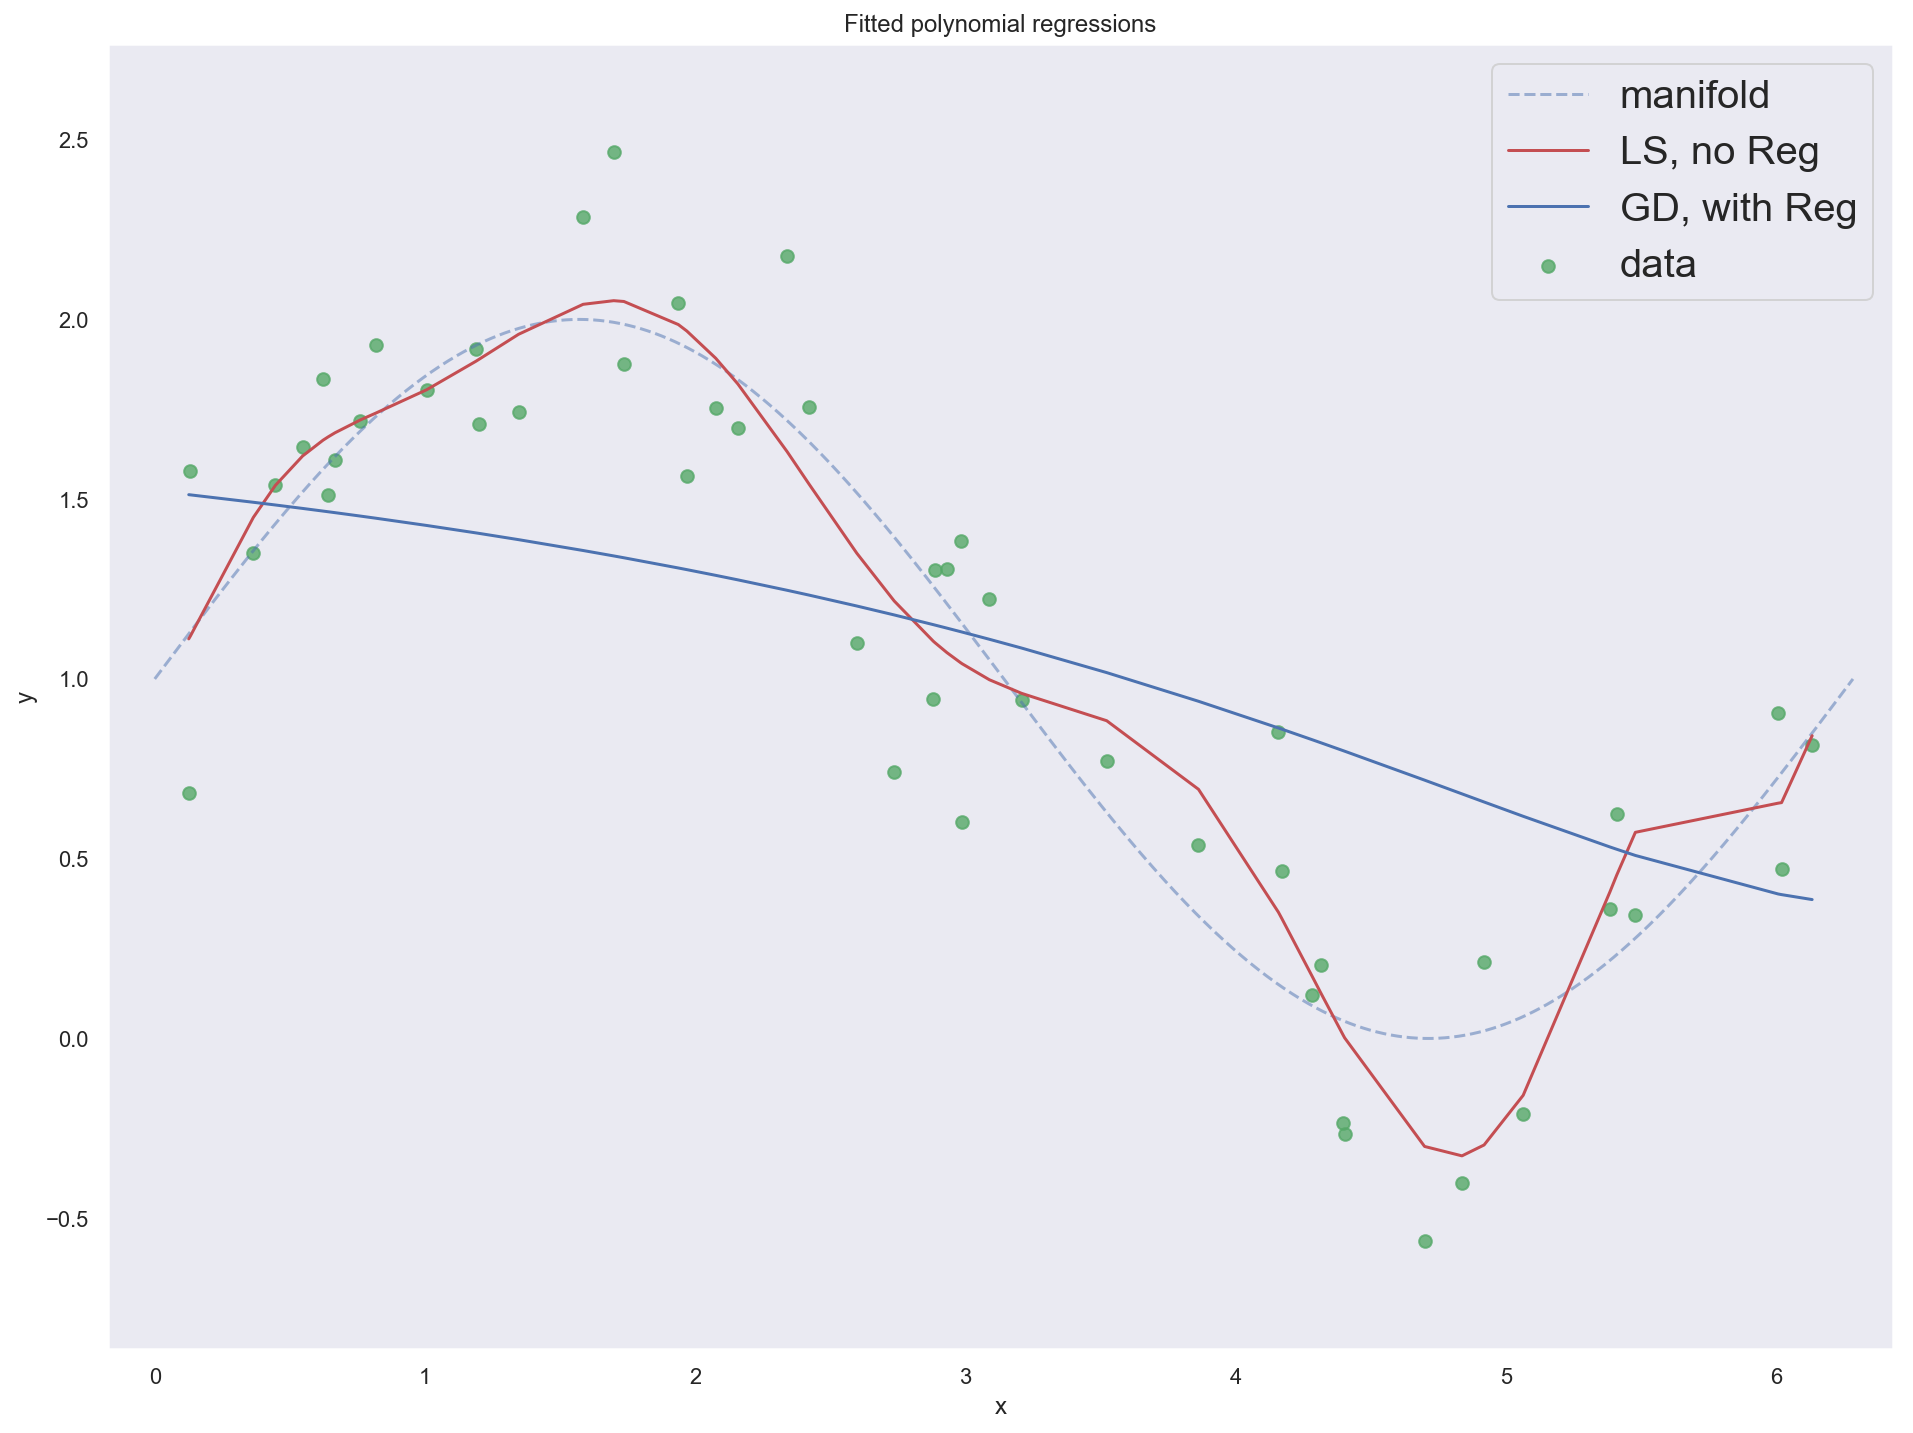

In [19]:
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

degree = 10
dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
Xd10 = np.array(dlist).T
wd10 = np.dot(np.dot(np.linalg.inv(np.dot(Xd10.T, Xd10)), Xd10.T), data['y_train'])
yd10_hat = np.dot(wd10, Xd10.T)
plt.plot(data['x_train'], yd10_hat, color='r', label='LS, no Reg')

y_hat = np.dot(w, X.T)
plt.plot(data['x_train'], y_hat, color='b', label='GD, with Reg')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

- here we can observe that regularization is so high that it flattens 10th degree curve into a line
- let's reduce regularization parameter to gen something which looks more like 3rd degree polinomial

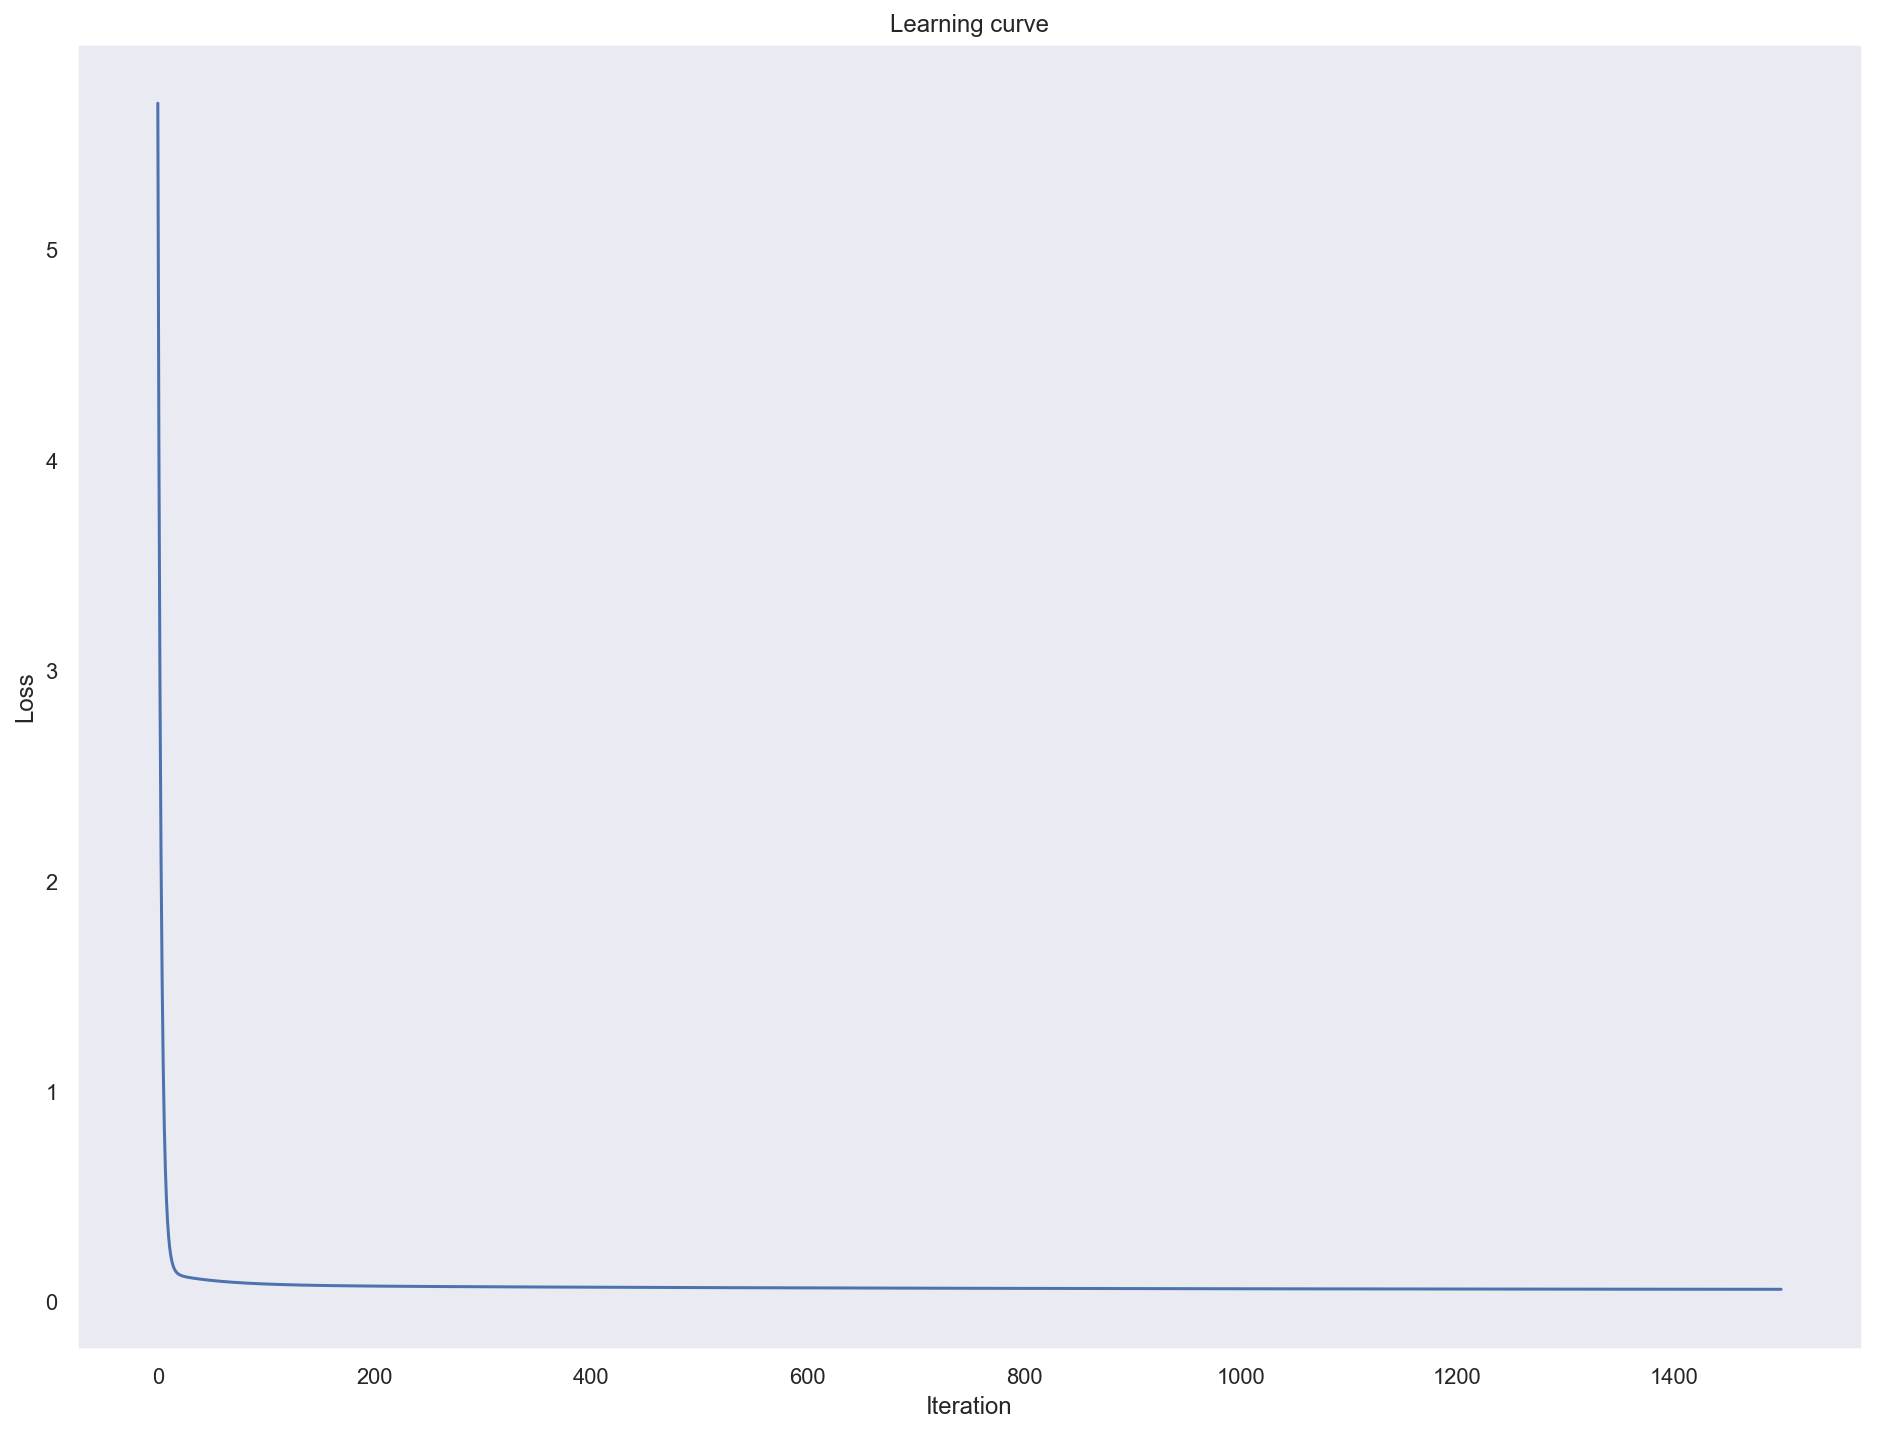

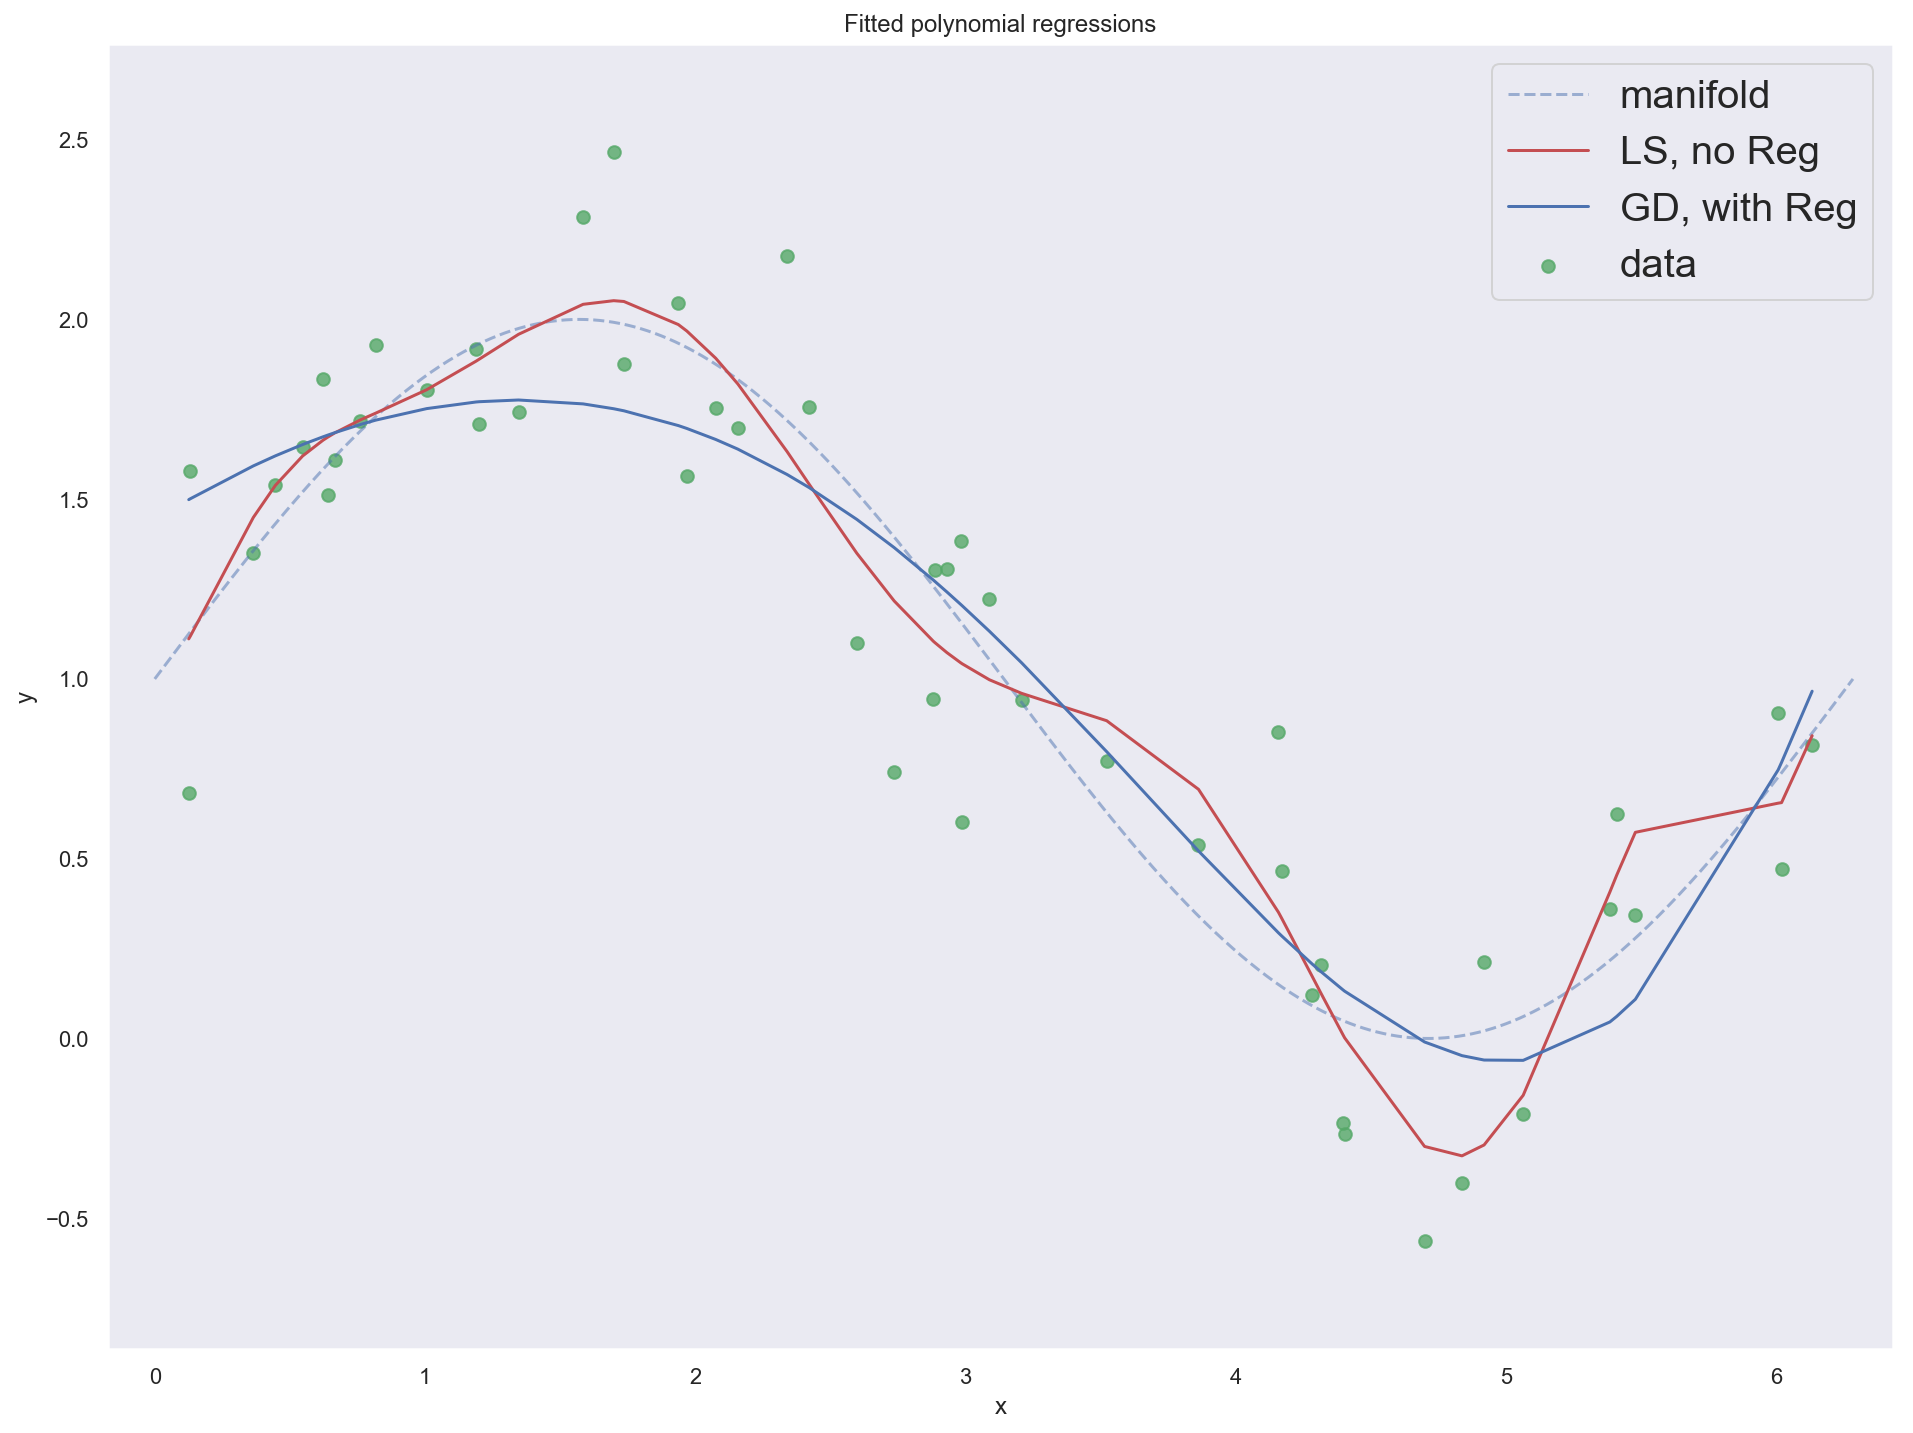

In [20]:
np.random.seed(42)
# initial weights of the model
# w = np.array([-1.0] * X.shape[1])
w = np.random.normal(0, 1, size=X.shape[1])
# maximim number of iterations
n_iter = 1500
# alpha or learning rate
lr = 0.2
# we will keep all MSE values to plot graph
loss = []
# regularization parameter
lmbd = 0.001
# weight of L1
alpha = 0.05

for _ in range(n_iter):
    grad0 = np.dot((np.dot(X, w.T) - y), X)[0]/X.shape[0]
    grad1 = np.dot((np.dot(X, w.T) - y), X)[1:]/X.shape[0] + alpha*lmbd*np.sign(w[1:]) + (1 - alpha)*lmbd*w[1:]
    grad = np.hstack([grad0, grad1])
    w -= lr*grad
    loss.append(
        ((np.dot(X, w.T) - y)**2).sum()/(2*X.shape[0]) + alpha*lmbd*np.abs(w).sum() + (1 - alpha)*lmbd*(w**2).sum()
    )
    
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.show()

plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

degree = 10
dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
Xd10 = np.array(dlist).T
wd10 = np.dot(np.dot(np.linalg.inv(np.dot(Xd10.T, Xd10)), Xd10.T), data['y_train'])
yd10_hat = np.dot(wd10, Xd10.T)
plt.plot(data['x_train'], yd10_hat, color='r', label='LS, no Reg')

y_hat = np.dot(w, X.T)
plt.plot(data['x_train'], y_hat, color='b', label='GD, with Reg')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

## Logistic Regression using Stochastic Gradient Descent

In [21]:
np.random.seed(42)
X_mean = np.random.uniform(-10, 10, size=500)
X_std = np.random.uniform(1, 5, size=500)
X = np.random.normal(
    X_mean,
    X_std,
    size=(500000, 500)
)

y = ((X[:, 250:]/X_std[250:]).sum(axis=1) > 0.3*X_mean[250:].sum()).astype(np.uint8)

pd.Series(y).value_counts()

0    266488
1    233512
dtype: int64

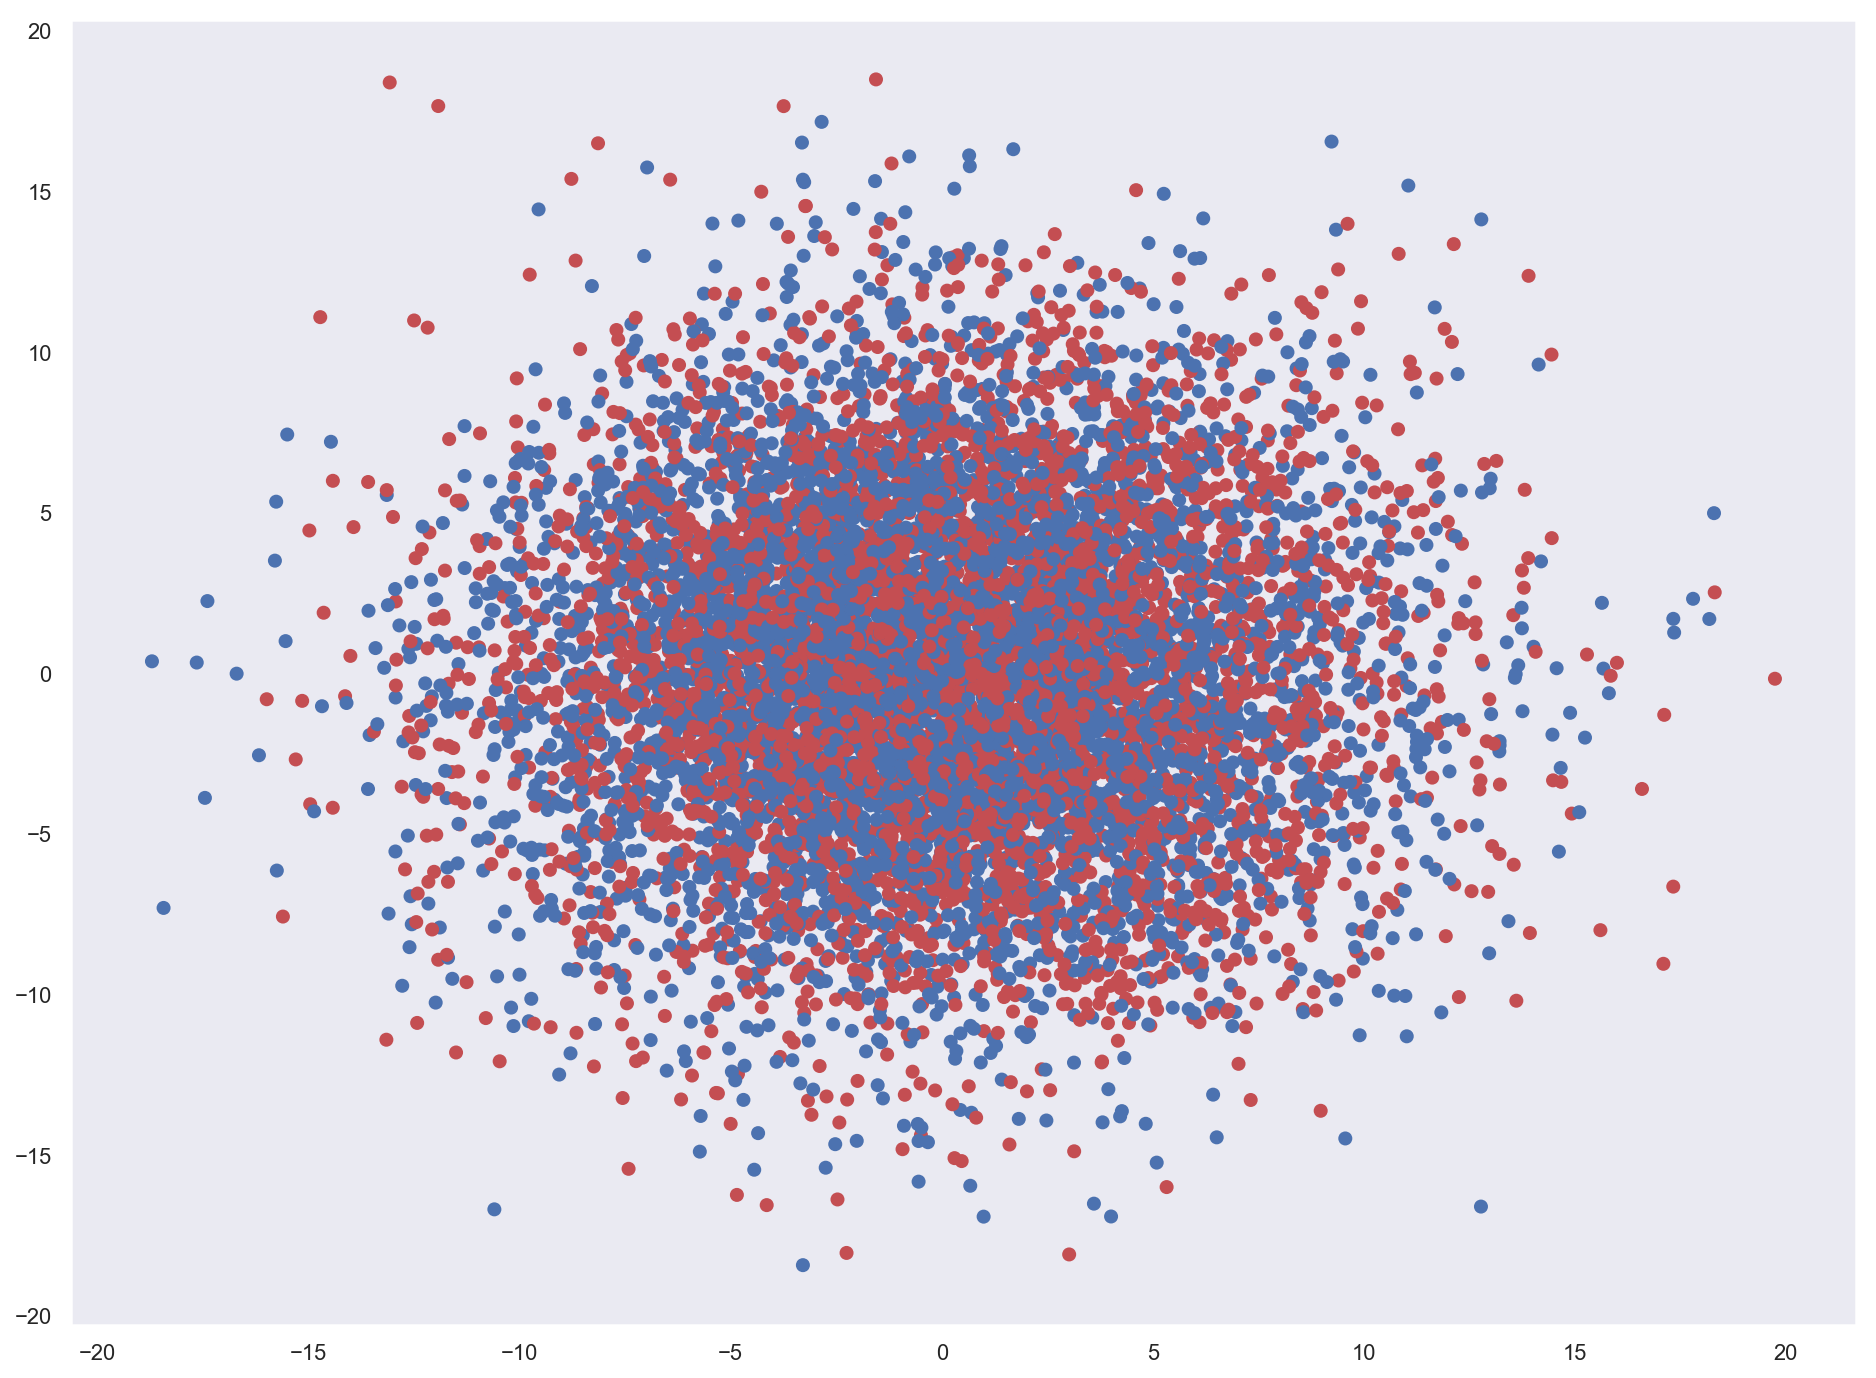

In [22]:
from sklearn.decomposition import PCA

X_2d = PCA(n_components=2).fit_transform(X[:10000, :])

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=['r' if i == 1 else 'b' for i in y])
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
%%time
y_hat = LogisticRegression().fit(X, y).predict(X)

CPU times: user 2min 37s, sys: 3.06 s, total: 2min 40s
Wall time: 41.1 s


In [25]:
print('Accuracy (LogReg):', (y_hat == y).sum()/X.shape[0])
print('Accuracy (Random):', (np.random.binomial(1, 0.5, size=X.shape[0]) == y).sum()/X.shape[0])
print('Accuracy (all 0): ', (np.zeros(X.shape[0]) == y).sum()/X.shape[0])

Accuracy (LogReg): 0.996792
Accuracy (Random): 0.499932
Accuracy (all 0):  0.532976


In [576]:
X = np.concatenate([np.ones(X.shape[0])[:, None], X], axis=1)

X.shape

(500000, 501)

In [27]:
w = np.random.normal(0, 1, size=X.shape[1])

In [28]:
%%time
_ = np.dot((np.dot(X, w.T) - y), X)

CPU times: user 1.2 s, sys: 15.8 ms, total: 1.22 s
Wall time: 326 ms


In [29]:
print('Expected time for 1500 iterations:', (326*1500/1000)/60, 'minutes')

Expected time for 1500 iterations: 8.15 minutes


### Stochastic Gradient Descent

#### Full Batch Gradient Descent
```python
for _ in range(n_iterations):
    params_grad = evaluate_gradient(loss_function, data, params)
    params = params - learning_rate * params_grad
    if is_in_local_minima():
        break
```

#### Mini Batch Gradient Descent
```python
for _ in range(n_iterations):
    batch = sample_batch(data, size=N):
    params_grad = evaluate_gradient(loss_function, batch, params)
    params = params - learning_rate * params_grad
    if is_in_local_minima():
        break
```

#### Stochastic Batch Gradient Descent
```python
while is_in_local_minima():
    observation = sample_one_observation(data)
    params_grad = evaluate_gradient(loss_function, observation, params)
    params = params - learning_rate * params_grad
    if is_in_local_minima():
        break
```

<img src='./../../img/descent.png' />

Let's infer GD Algorithm for Logistic Regression. As you remember from previous lectures, the loss function for LR is:

$$\large \begin{array}{rcl}\mathcal{L} &=& -\frac{1}{n}\sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)
\end{array}$$

Before taking derivative of the loss function let's note that derivative of a sigmoid function can be expressed as function of sigmoind (prove it):

$$\large \frac{\partial \sigma\left(x\right)}{\partial x} = \sigma\left(x\right) \left(1 - \sigma\left(x\right)\right)$$

Now let's do some math to calculate gradient of the loss function wrt parameters for entire dataset:

$$\large \begin{array}{rcl}\frac{\partial \mathcal{L}}{\partial \vec{w}} &=& -\frac{\partial}{\partial \vec{w}} \frac{1}{n}\sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right) \\
&=& -\frac{1}{n}\sum_{i=1}^n  y_i \frac{\partial}{\partial \vec{w}} \ln \sigma + \left(1 - y_i\right) \frac{\partial}{\partial \vec{w}} \ln \left(1 - \sigma\right) \\
&=& -\frac{1}{n}\sum_{i=1}^n  y_i \frac{1}{\sigma}\frac{\partial}{\partial \vec{w}} \sigma  + \left(1 - y_i\right) \frac{1}{\left(1 - \sigma\right)} \cdot \left(-1\right) \cdot \frac{\partial}{\partial \vec{w}} \sigma \\
&=& -\frac{1}{n}\sum_{i=1}^n  y_i \frac{1}{\sigma} \sigma \left(1 - \sigma\right) \frac{\partial}{\partial \vec{w}} \vec{w}^T \vec{x}_i + \\&& \left(1 - y_i\right) \frac{1}{\left(1 - \sigma\right)} \cdot \left(-1\right) \cdot \sigma \left(1 - \sigma\right) \frac{\partial}{\partial \vec{w}} \vec{w}^T \vec{x}_i \\
&=& -\frac{1}{n}\sum_{i=1}^n  y_i \left(1 - \sigma\right) \frac{\partial}{\partial \vec{w}} \vec{w}^T \vec{x}_i - \left(1 - y_i\right) \sigma \frac{\partial}{\partial \vec{w}} \vec{w}^T \vec{x}_i \\
&=& -\frac{1}{n}\sum_{i=1}^n  y_i \left(1 - \sigma\right) \vec{x}_i - \left(1 - y_i\right) \sigma \vec{x}_i \\
&=& -\frac{1}{n}\sum_{i=1}^n  \vec{x}_i \left(y_i - y_i \sigma - \sigma + \sigma y_i \right) \\
&=& -\frac{1}{n}\sum_{i=1}^n  \vec{x}_i \left(y_i - \sigma\right)
\end{array}$$

And for one single example gradient updating rule is:
$$\large \begin{array}{rcl}\frac{\partial \mathcal{L}}{\partial \vec{w}} &=& -\vec{x}_i \left(y_i - \sigma\right)
\end{array}$$

Same with regularization:
$$\large \begin{array}{rcl}\frac{\partial \mathcal{L}}{\partial \vec{w}} &=& -\vec{x}_i \left(y_i - \sigma\right) + \alpha \lambda \cdot \text{sign}(\vec{w}) + \left(1 - \alpha\right) \lambda \vec{w}
\end{array}$$

In [30]:
X_mean = X[:, 1:].mean(axis=0)
X_std = X[:, 1:].std(axis=0)
X[:, 1:] = (X[:, 1:] - X_mean)/X_std

In [87]:
from tqdm import tqdm

In [146]:
np.random.seed(42)
# initial weights of the model
w = np.random.normal(0, 1, size=X.shape[1])
# maximim number of iterations
n_iter = 25000
# alpha or learning rate
lr = 0.009
# we will keep all LogLoss values to plot graph
loss = []
acc = []
# regularization parameter
lmbd = 0.001/500
# weight of L1
alpha = 0.95

tolerance = 1e-16


for ix in tqdm(range(n_iter), total=n_iter):
    i = np.random.randint(X.shape[0])    

    s = 1/(1 + np.exp(-np.dot(X[i, :], w)))
        
    loss.append(
        -np.log(max(s, tolerance)) if y[i] == 1 else \
        -np.log(1 - min(s, tolerance)) + \
        alpha*lmbd*np.abs(w).sum() + (1 - alpha)*lmbd*(w**2).sum()
    )    
    acc.append(int(int(s > 0.5) == y[i]))
    
    grad = -X[i, :] * (y[i] - s)
    grad[1:] += alpha*lmbd*np.sign(w[1:]) + (1 - alpha)*lmbd*w[1:]
    
    w -= lr*grad    

100%|██████████| 25000/25000 [00:01<00:00, 14381.27it/s]


In [147]:
acc_total = ((1/(1 + np.exp(-np.dot(X, w))) > 0.5).astype(np.uint8) == y).sum()/X.shape[0]

print('Accuracy:', acc_total)

Accuracy: 0.958526


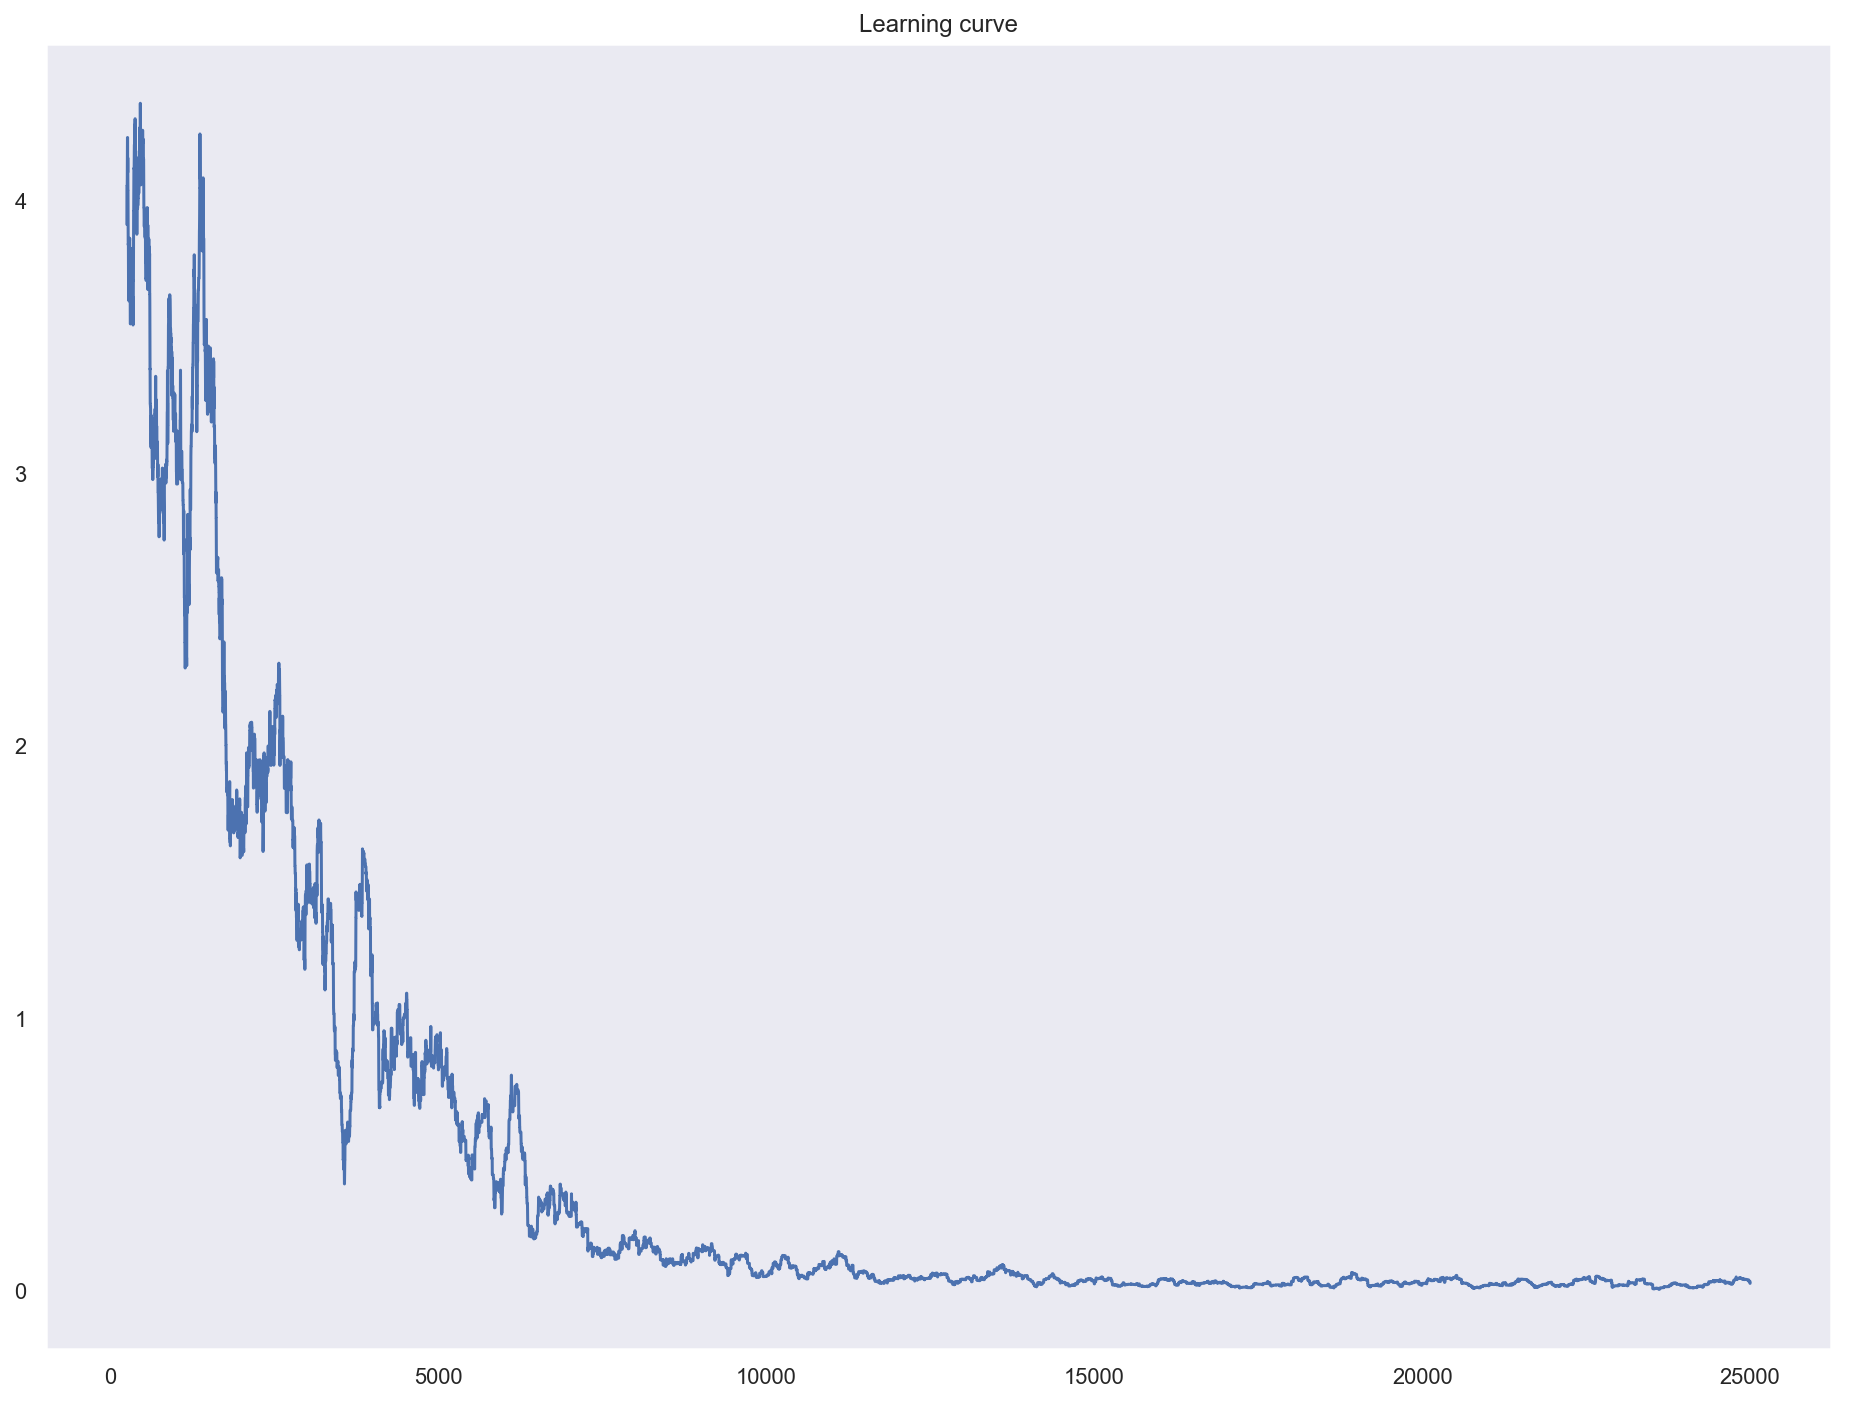

In [148]:
pd.Series(loss).rolling(250).mean().plot()
plt.title('Learning curve')
plt.show()

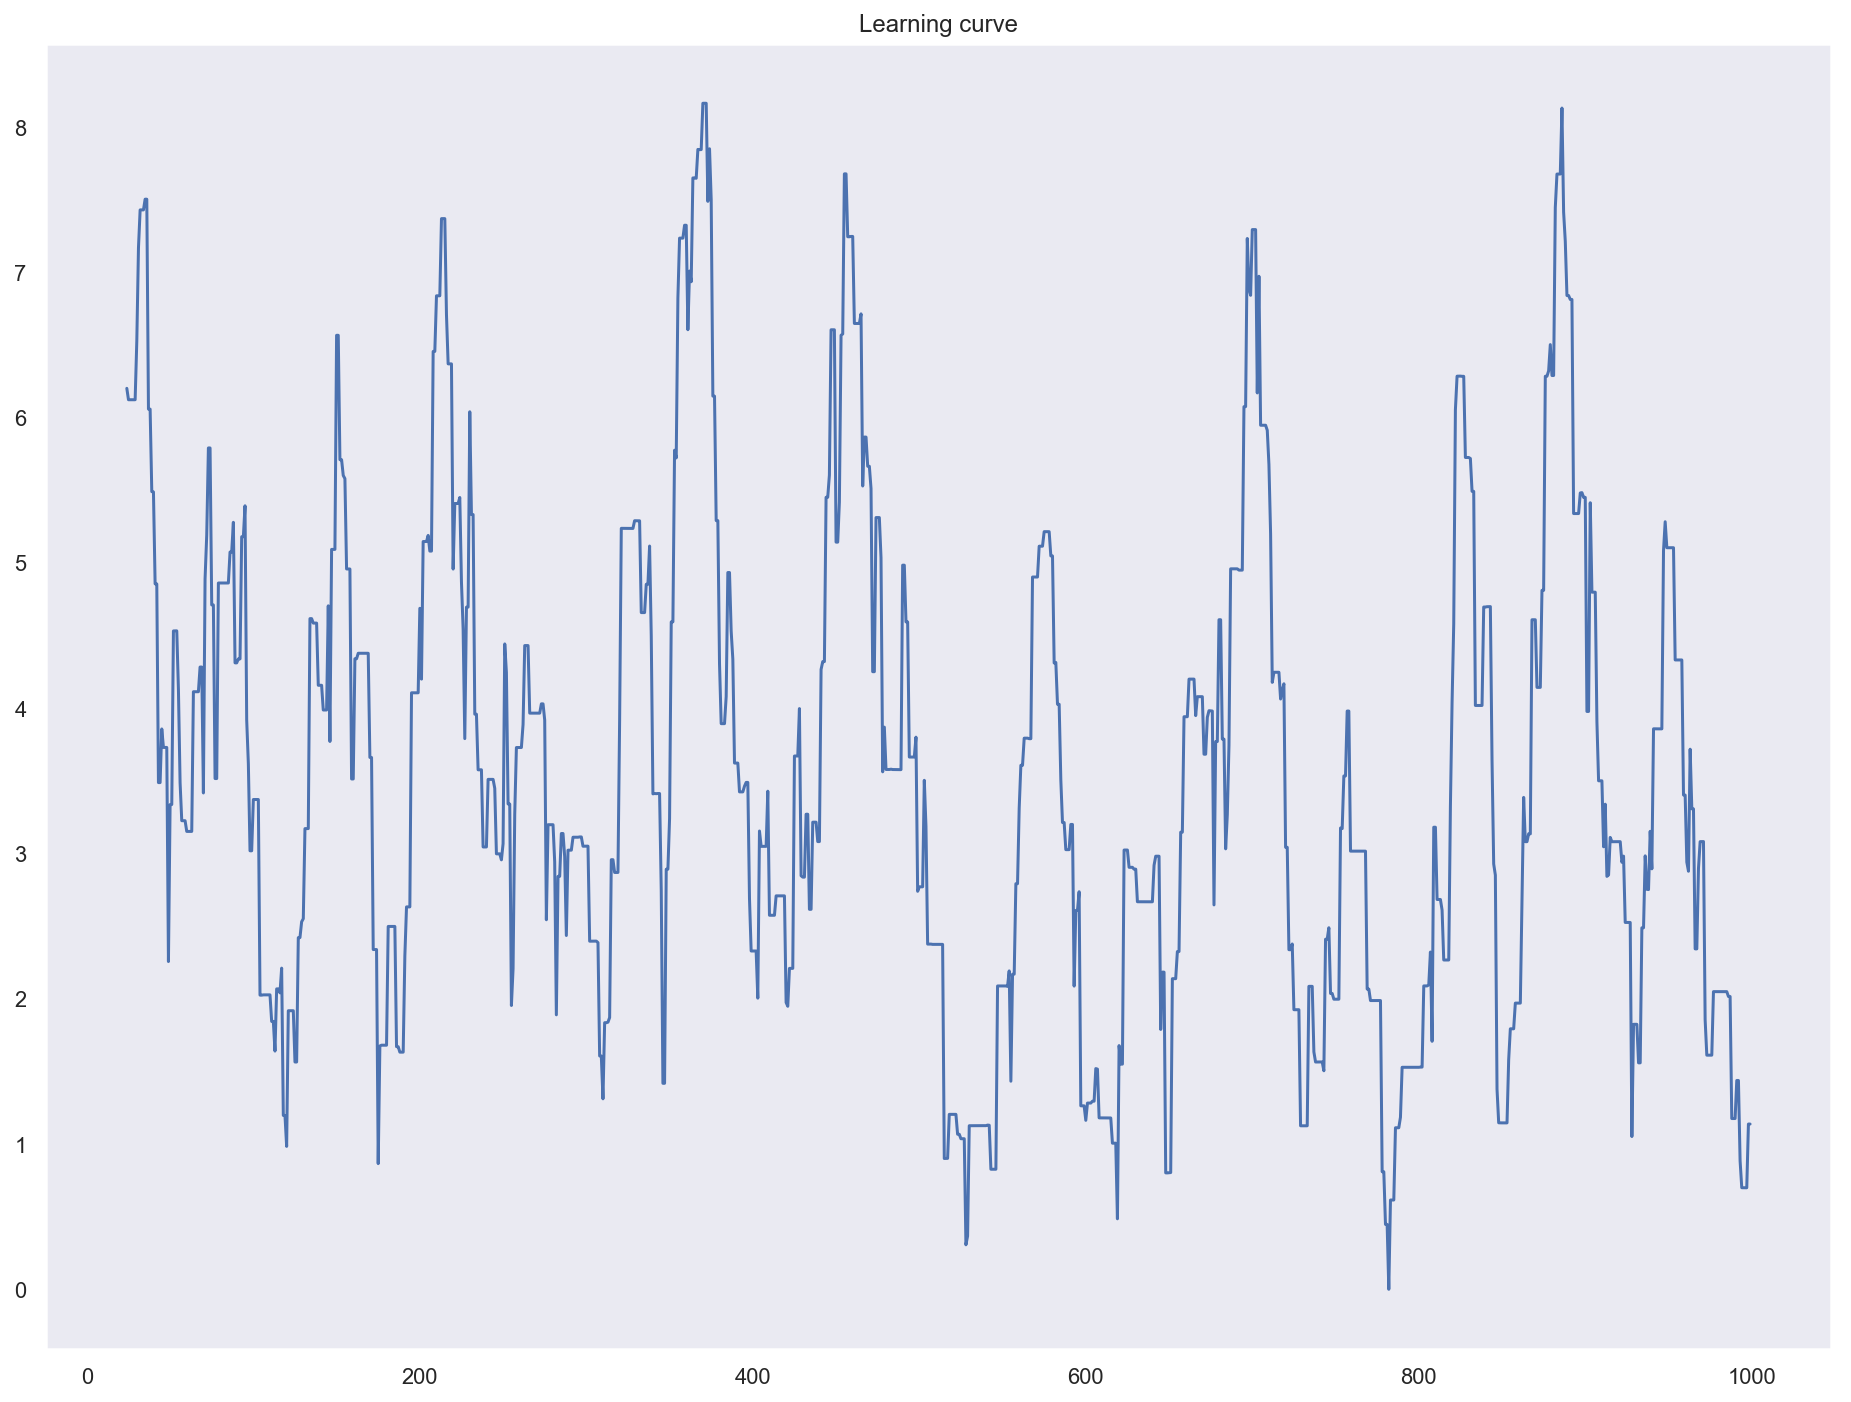

In [149]:
pd.Series(loss[:1000]).rolling(25).mean().plot()
plt.title('Learning curve')
plt.show()

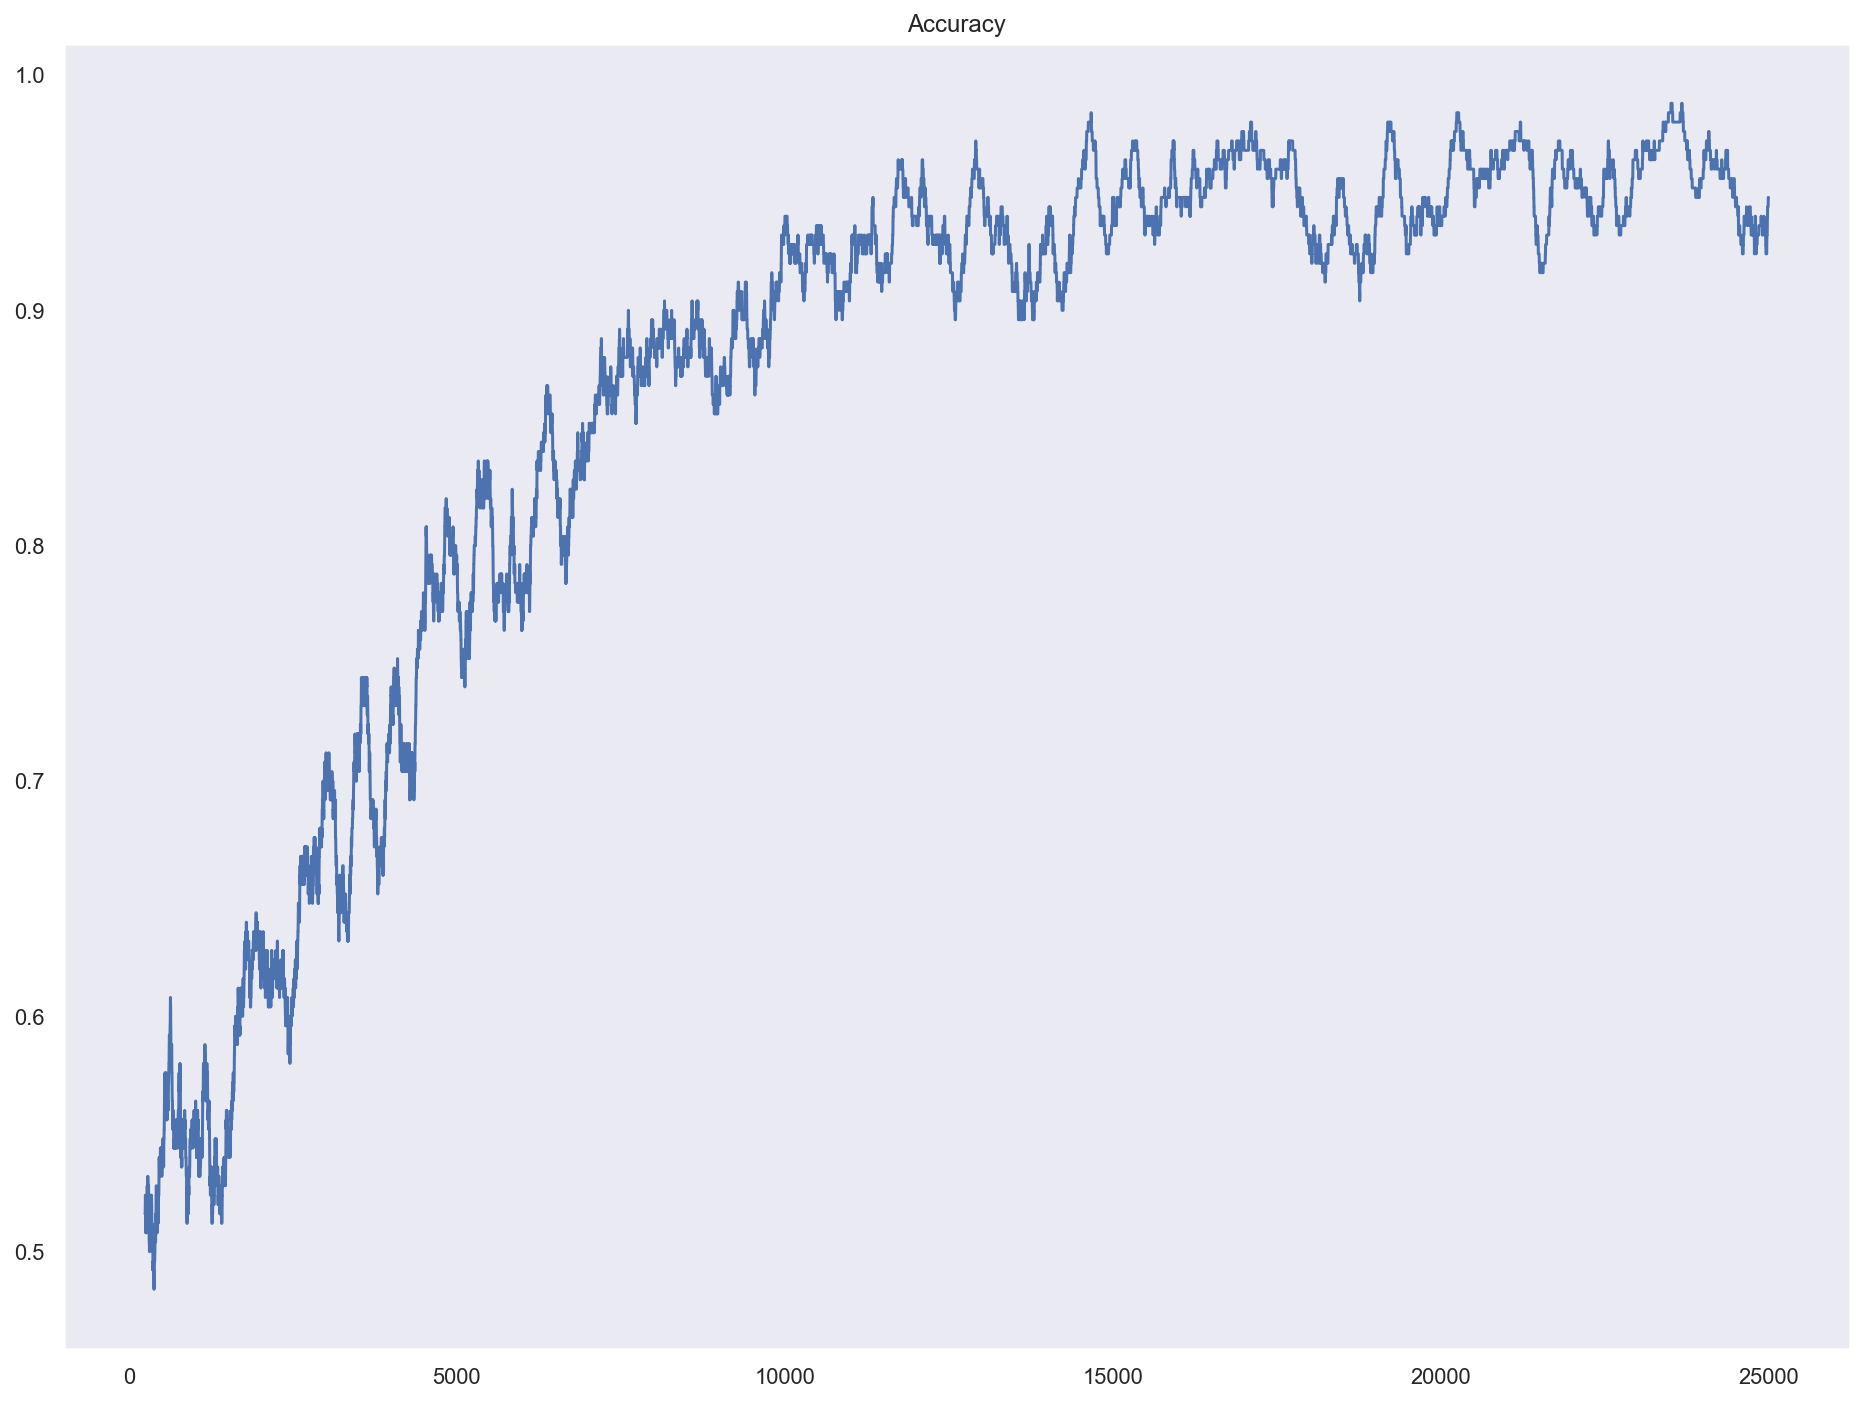

In [150]:
pd.Series(acc).rolling(250).mean().plot()
plt.title('Accuracy')
plt.show()

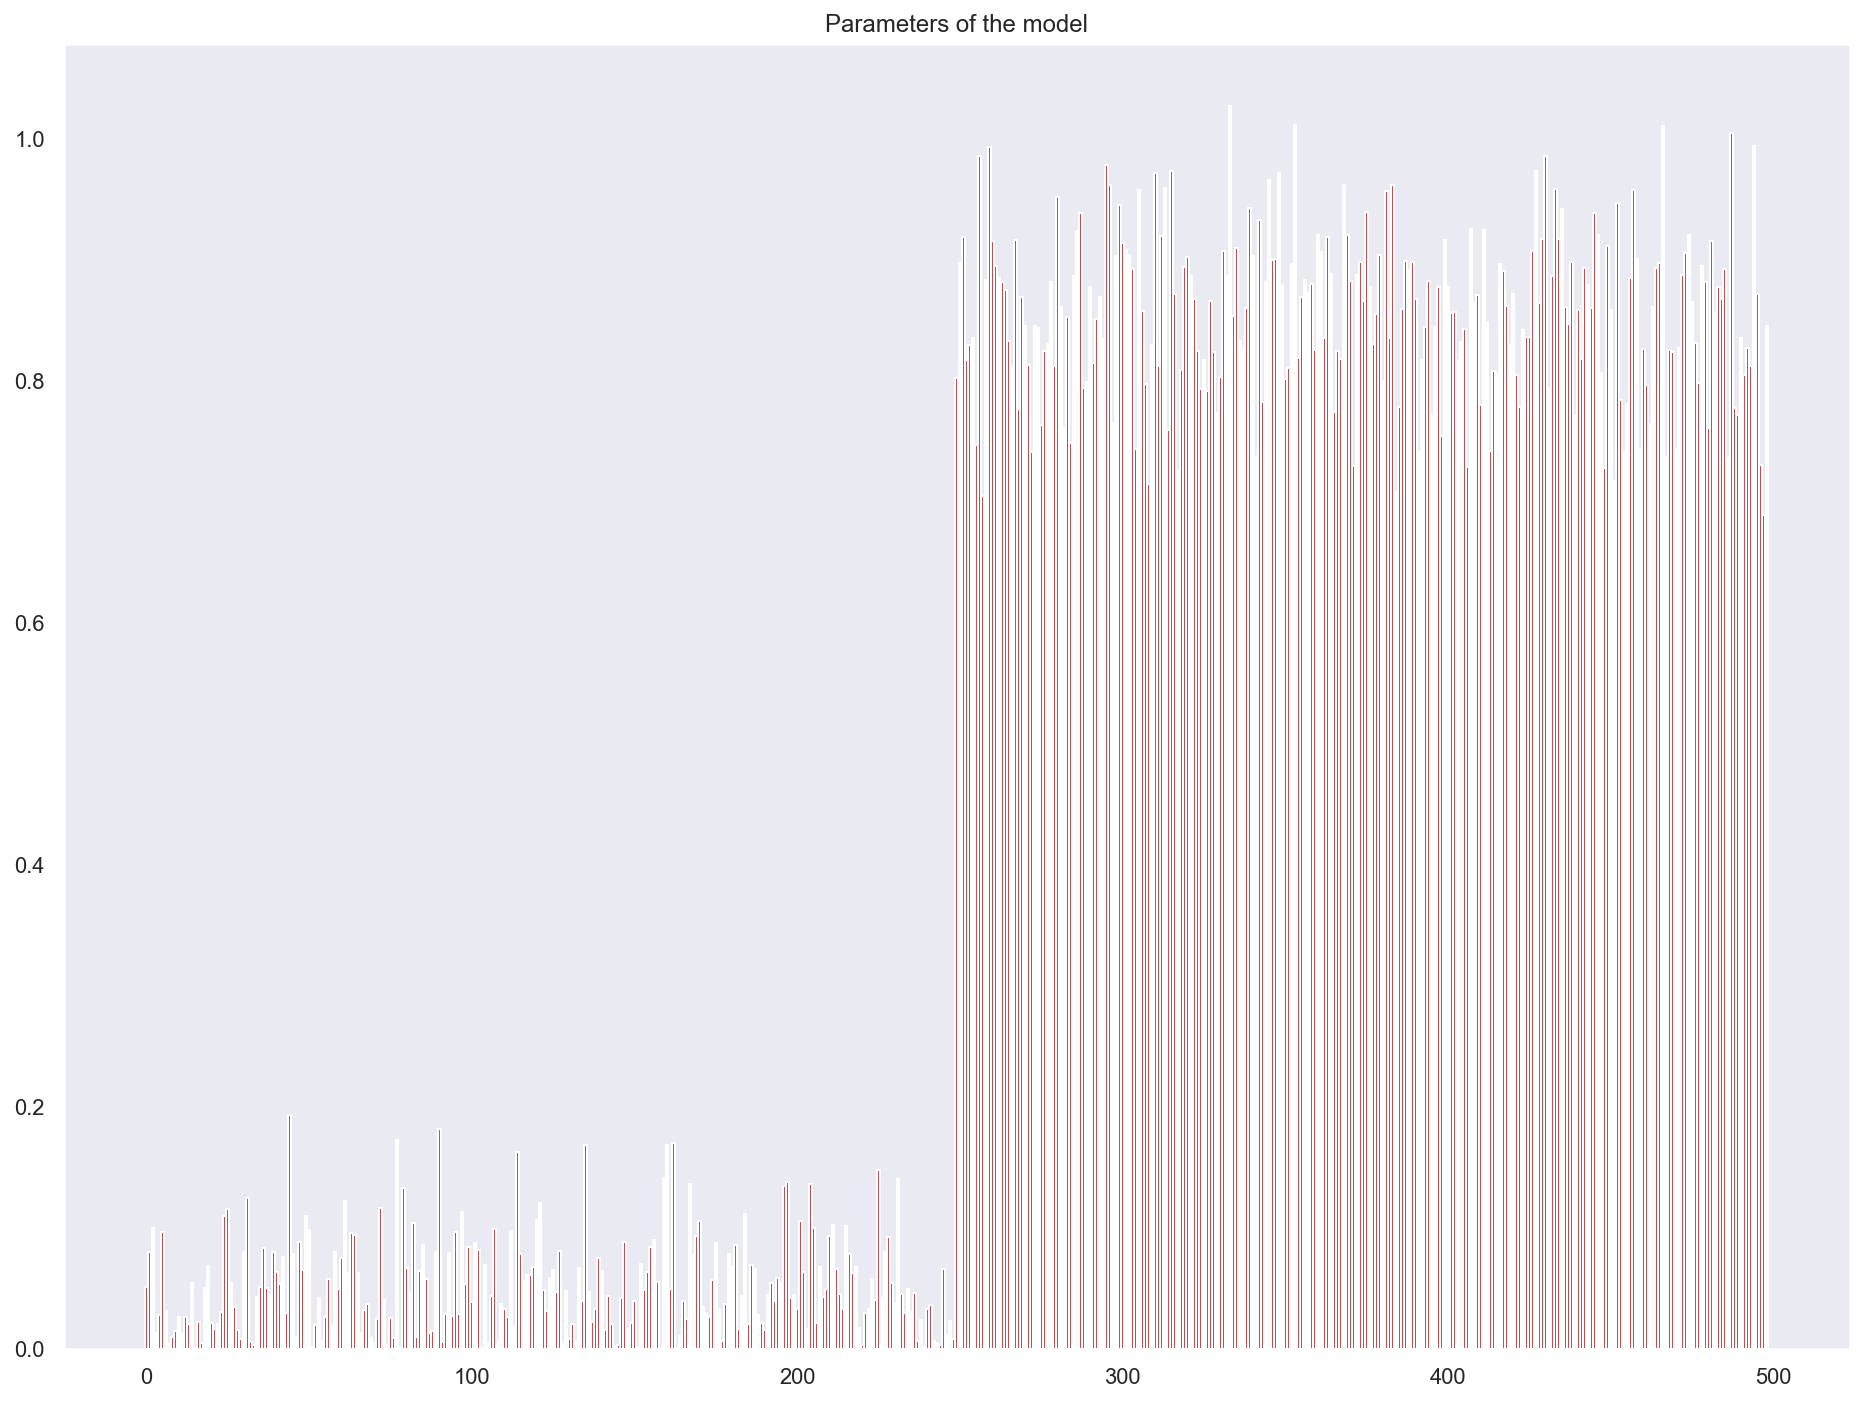

In [151]:
plt.bar(range(w.shape[0] - 1), np.abs(w[1:]), color='r')
plt.title('Parameters of the model')
plt.show()

# Summary

<img src='./../../img/summary_l8.jpg' />